# Exploratory Data Analysis - Marco Verratti

## Import Libraries

In [ ]:
# Operating System
import os
# Numerical Manipulation
import numpy as np
# Data Manipulation
import pandas as pd
# Import Visualization
import matplotlib.pyplot as plt
# Seaborn Statistical Visualization
import seaborn as sns
# Stats & Kurtosis
from scipy import stats
from scipy.stats import kurtosis
# Bokeh visualization
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
# Statistical Modeling
import statsmodels.api as sm

### M.L Libraries

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from nonconformist.nc import RegressorNc
from nonconformist.icp import IcpRegressor

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Loading Marco Verratti Data
df = pd.read_csv('/work/verratti-clean.csv')

In [ ]:
# Basic information about the data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   match                     16 non-null     object 
 1   competition               16 non-null     object 
 2   date                      16 non-null     object 
 3   position                  16 non-null     object 
 4   minutes_played            16 non-null     int64  
 5   total_actions             16 non-null     int64  
 6   total_actions_successful  16 non-null     int64  
 7   TAS_percent               16 non-null     int64  
 8   goals                     16 non-null     int64  
 9   assists                   16 non-null     int64  
 10  shots                     16 non-null     int64  
 11  shots_on_target           16 non-null     int64  
 12  SOT_percent               16 non-null     int64  
 13  xG                        16 non-null     float64
 14  passes      

In [ ]:
# Statistical description of the data
df.describe()

,minutes_played,total_actions,total_actions_successful,TAS_percent,goals,assists,shots,shots_on_target,SOT_percent,xG,...,aerial_duels,aerial_duels_won,ADW_percent,interceptions,losses,losses_own_half,LOH_percent,recoveries,recoveries_opp_half,ROPH_percent
count,16.000000,16.000000,16.000000,16.000000,16.0,16.000000,16.000000,16.0,16.0,16.000000,...,16.00000,16.00000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,91.875000,119.312500,91.812500,75.750000,0.0,0.125000,0.187500,0.0,0.0,0.006250,...,0.93750,0.31250,19.812500,4.375000,9.062500,4.250000,48.875000,8.625000,3.562500,40.562500
std,7.126243,27.601253,27.476581,8.504901,0.0,0.341565,0.543906,0.0,0.0,0.017464,...,1.12361,0.60208,37.155921,2.093641,3.820449,2.380476,17.873164,3.685557,2.308499,20.532799
min,74.000000,66.000000,45.000000,59.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.00000,0.000000,1.000000,2.000000,2.000000,25.000000,4.000000,0.000000,0.000000
25%,89.500000,99.750000,69.000000,68.750000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.00000,0.00000,0.000000,3.000000,6.750000,3.000000,39.000000,5.750000,1.750000,26.500000
50%,95.000000,128.500000,99.000000,78.500000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.50000,0.00000,0.000000,4.000000,9.000000,4.000000,50.000000,9.000000,4.000000,41.000000
75%,97.000000,142.000000,114.000000,83.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,2.00000,0.25000,12.500000,5.000000,10.000000,5.000000,56.000000,11.000000,5.000000,51.500000
max,99.000000,150.000000,127.000000,87.000000,0.0,1.000000,2.000000,0.0,0.0,0.060000,...,3.00000,2.00000,100.000000,10.000000,20.000000,12.000000,100.000000,16.000000,9.000000,82.000000


In [ ]:
# Rows & Columns 
print(df.shape)

(16, 39)


In [ ]:
df.isnull().sum()

match                       0
competition                 0
date                        0
position                    0
minutes_played              0
total_actions               0
total_actions_successful    0
TAS_percent                 0
goals                       0
assists                     0
shots                       0
shots_on_target             0
SOT_percent                 0
xG                          0
passes                      0
passes_accurate             0
PA_percent                  0
long_passes                 0
long_passes_accurate        0
LPA_percent                 0
crosses_accurate            0
crosses_accurate.1          0
CA_percent                  0
dribbles                    0
dribbles_successful         0
DS_percent                  0
duels                       0
duels_won                   0
DW_percent                  0
aerial_duels                0
aerial_duels_won            0
ADW_percent                 0
interceptions               0
losses    

## Position Relevancy

In [ ]:
# Using 'value_counts' function, you can count the frequency of each position
position_counts = df['position'].value_counts()
print(position_counts)

# If you want to see just the top 3 positions
top_three_positions = df['position'].value_counts().head(3)
print(top_three_positions)

# To get the average (mean) frequency of the top 3 positions
mean_top_three = top_three_positions.mean()
print(mean_top_three)

DMF                 5
LCMF3               3
LCMF                3
RCMF                1
DMF, LW             1
LW, RCMF3           1
DMF, LCMF3          1
DMF, RCMF, RCMF3    1
Name: position, dtype: int64
DMF      5
LCMF3    3
LCMF     3
Name: position, dtype: int64
3.6666666666666665


- DMF (Defensive Midfielder): The DMF, or Defensive Midfielder, is a pivotal position in football. This player operates in the central area of the midfield and is primarily responsible for providing defensive cover to the team. The main duties of the DMF include breaking up the opponent's plays, intercepting passes, making tackles, and protecting the backline. They act as a shield in front of the defense, helping to minimize the opposition's attacking threats and regaining possession for their team. Additionally, the DMF often plays a role in distributing the ball from the defensive zone to the attacking players, initiating build-up play, and supporting the team's transition from defense to attack.

- LCMF (Left Center Midfielder): The LCMF, or Left Center Midfielder, is a position that operates centrally but favors the left side of the field. This player plays a vital role in linking the defense and attack, as well as providing support to the left-wing and left-back. The LCMF is typically tasked with distributing accurate passes, creating scoring opportunities, and contributing to the team's ball possession and ball circulation. They may also be involved in defensive duties, helping to close down opponents and protect the left flank when required.

- LCMF3 (Left Center Midfielder 3): The LCMF3 is a position commonly found in tactical systems with a three-man defense line (e.g., 3-5-2 formation). This position refers to the left center midfielder in a back three formation. The LCMF3 shares similar responsibilities as the LCMF, but their positioning and role might be slightly different due to the formation. They support the left-wing, contribute to ball distribution, and help cover spaces in the defense. The LCMF3 should be comfortable playing in a back three and possess the necessary attributes to succeed in this role.

These positions in football are vital for a team's tactical organization, ball distribution, and defensive stability. The DMF provides a solid defensive base, while the LCMF and LCMF3 contribute to the team's attacking play and ball circulation from the central midfield areas.

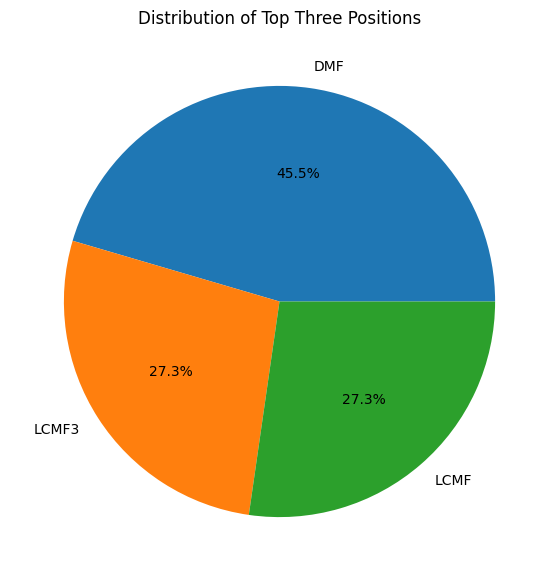

In [ ]:
# Calculate the proportions
proportions = top_three_positions / top_three_positions.sum()

# Generate the pie chart
plt.figure(figsize=(10,7))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%')
plt.title("Distribution of Top Three Positions")
plt.show()

## Average Time Played

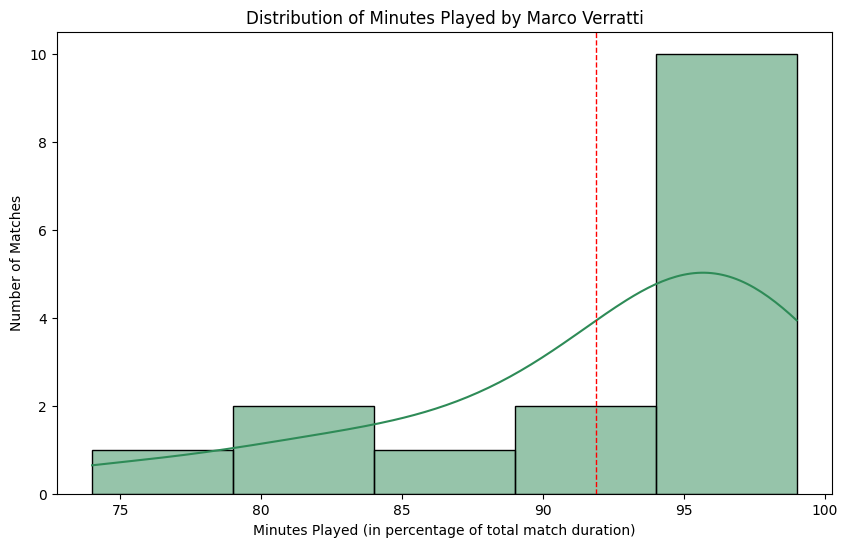

Marco Verratti played on average 91.875 minutes per match.


In [ ]:
average_minutes_played = df['minutes_played'].mean()

# Plot the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.histplot(df['minutes_played'], kde=True, color='seagreen')
plt.axvline(average_minutes_played, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Minutes Played by Marco Verratti')
plt.xlabel('Minutes Played (in percentage of total match duration)')
plt.ylabel('Number of Matches')
plt.show()

print(f"Marco Verratti played on average {average_minutes_played} minutes per match.")

## Interceptions

Marco Verratti has an average of 4.375 interceptions per match.
The minimum interceptions in a match by Marco Verratti is 1.
The maximum interceptions in a match by Marco Verratti is 10.


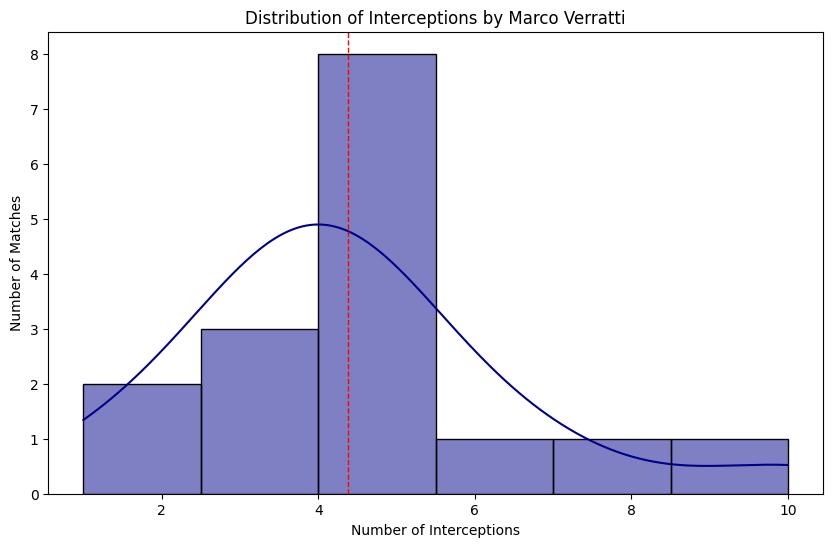

In [ ]:
# Calculate the average interceptions
average_interceptions = df['interceptions'].mean()

# Find the minimum and maximum interceptions
min_interceptions = df['interceptions'].min()
max_interceptions = df['interceptions'].max()

# Print out the results
print(f"Marco Verratti has an average of {average_interceptions} interceptions per match.")
print(f"The minimum interceptions in a match by Marco Verratti is {min_interceptions}.")
print(f"The maximum interceptions in a match by Marco Verratti is {max_interceptions}.")

# Plot the distribution of interceptions
plt.figure(figsize=(10, 6))
sns.histplot(df['interceptions'], kde=True, color='darkblue')
plt.axvline(average_interceptions, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of Interceptions by Marco Verratti')
plt.xlabel('Number of Interceptions')
plt.ylabel('Number of Matches')
plt.show()

## Kurtosis

- The kurtosis of a data set is a measure of the "tailedness" of the probability distribution of a real-valued random variable. In simpler terms, it's a measure of the heaviness of the tails of the distribution. Here's what the kurtosis values you obtained generally suggest:

- A negative kurtosis value indicates that the distribution has lighter tails and a flat peak than the normal distribution. It is also called platykurtic. In other words, more of the variance is the result of infrequent extreme deviations, as opposed to frequent modestly sized deviations.

- A positive kurtosis value indicates that the distribution has heavier tails and a sharper peak than the normal distribution. It is also called leptokurtic.

Keep in mind that kurtosis is just a descriptive measure. Higher or lower kurtosis doesn't necessarily mean the variable is "good" or "bad" for a model. However, it can affect certain types of statistical analyses. For instance, many statistical techniques assume a normal distribution, so extreme kurtosis values can violate those assumptions and potentially make those techniques less reliable.

### The kurtosis is given by:

$$ \text{Kurtosis}(X) = \frac{E[(X - \mu)^4]}{\sigma^4} - 3 $$


In [ ]:
from scipy.stats import kurtosis

# Calculate and display the kurtosis for the variables of interest
for col in ['total_actions_successful', 'passes_accurate', 'long_passes_accurate', 'dribbles_successful','duels_won', 'aerial_duels_won','losses_own_half', 'recoveries_opp_half', 'interceptions']:
    cur = kurtosis(df[col])
    print(f'Kurtosis of {col}: {cur}')

Kurtosis of total_actions_successful: -1.1676277362971061
Kurtosis of passes_accurate: -1.1517974490716567
Kurtosis of long_passes_accurate: 1.6423981357248785
Kurtosis of dribbles_successful: -0.19017523700086203
Kurtosis of duels_won: -0.519775390625
Kurtosis of aerial_duels_won: 1.812921125644075
Kurtosis of losses_own_half: 5.19833910034602
Kurtosis of recoveries_opp_half: 0.010481458772582553
Kurtosis of interceptions: 1.5465020457141208


- total_actions_successful (-1.1676): This is a platykurtic distribution, meaning the distribution is flatter with lighter tails compared to a normal distribution. It implies that Verratti's successful actions are more uniformly distributed and less prone to extreme values. 

- passes_accurate (-1.1518): This is also a platykurtic distribution, suggesting that Verratti's pass accuracy results are fairly evenly spread out and less likely to produce very high or very low values. 

- long_passes_accurate (1.6424): This is a leptokurtic distribution, indicating that Verratti's long passes have a distribution with fatter tails and a sharper peak compared to a normal distribution. This suggests there might be more variability in his long pass accuracy with a greater chance of outliers (very high or very low values).

- dribbles_successful (-0.1902): This is slightly platykurtic, implying a fairly even spread of Verratti's successful dribbles without a high tendency for extreme results.

- duels_won (-0.5198): This is platykurtic too, suggesting that the number of duels Verratti wins in a game are evenly spread without being prone to extremes. 

- aerial_duels_won (1.8129): This variable is leptokurtic, which suggests that there might be some extreme values in Verratti's performance in aerial duels. This could be due to few games where he performed exceptionally well or poorly in aerial duels.

- losses_own_half (5.1983): This has a high positive kurtosis value, making it significantly leptokurtic. This suggests a large number of outliers in Verratti's performance with regards to losing possession in his own half. This aspect of his performance seems to have high variability and should be carefully evaluated.

- recoveries_opp_half (0.0105): This variable has a near-zero kurtosis, making it mesokurtic, which resembles a normal distribution. This means the data for Verratti's recoveries in the opponent's half is moderately peaked, indicating a balance between uniformity and variability. 

These kurtosis measurements help in understanding the nature of Marco Verratti's performance. Where there's high variability, like in his losses in own half, there might be specific situations or games that heavily impact these numbers. Conversely, aspects like passes and duels won show a more consistent performance.

### Feature Normalization

### The Standard Scaler transformation is given by:

$$ X' = \frac{X - \text{mean}(X)}{\text{std}(X)} $$


- Leptokurtic variables: 'long_passes_accurate', 'aerial_duels_won', 'losses_own_half'

- Platykurtic variables: 'total_actions_successful', 'passes_accurate', 'dribbles_successful', 'duels_won'

- Mesokurtic variables: 'recoveries_opp_half'

Leptokurtic variables normalized:
   long_passes_accurate  aerial_duels_won  losses_own_half  interceptions
0              0.641689         -0.536056        -0.108465      -0.678289
1             -0.825029         -0.536056         0.759257      -0.184988
2              0.641689         -0.536056        -0.542326      -0.184988
3              2.841765          1.179324         0.325396       1.294915
4             -0.091670          2.894704        -0.108465      -0.678289

Platykurtic variables normalized:
   total_actions_successful  passes_accurate  dribbles_successful  duels_won
0                  1.021930         0.783691             1.106223      1.875
1                 -0.970246        -1.171551             0.174667     -0.125
2                  0.833988         0.741186             0.174667     -0.375
3                  1.134694         1.293754            -1.688445      0.125
4                  0.721224         0.698680             1.106223      0.875

Mesokurtic variables nor

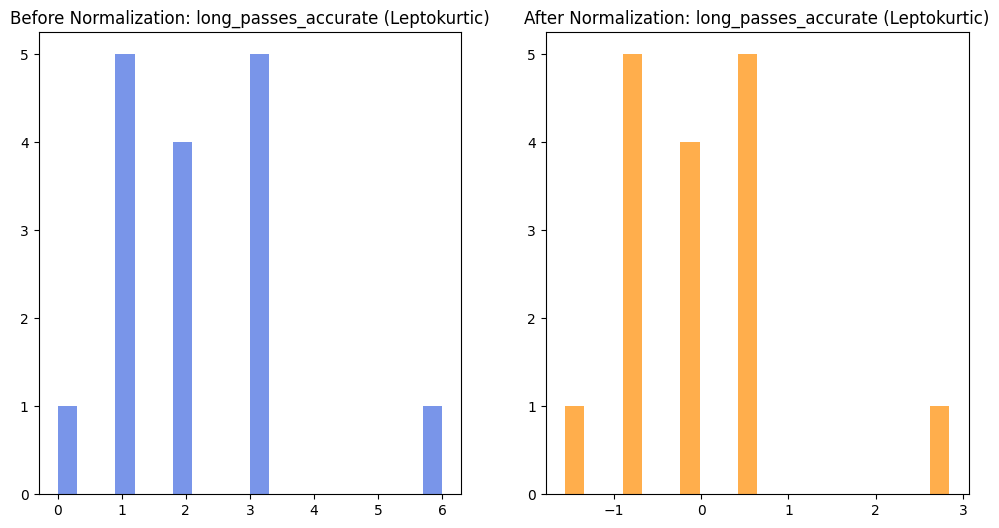

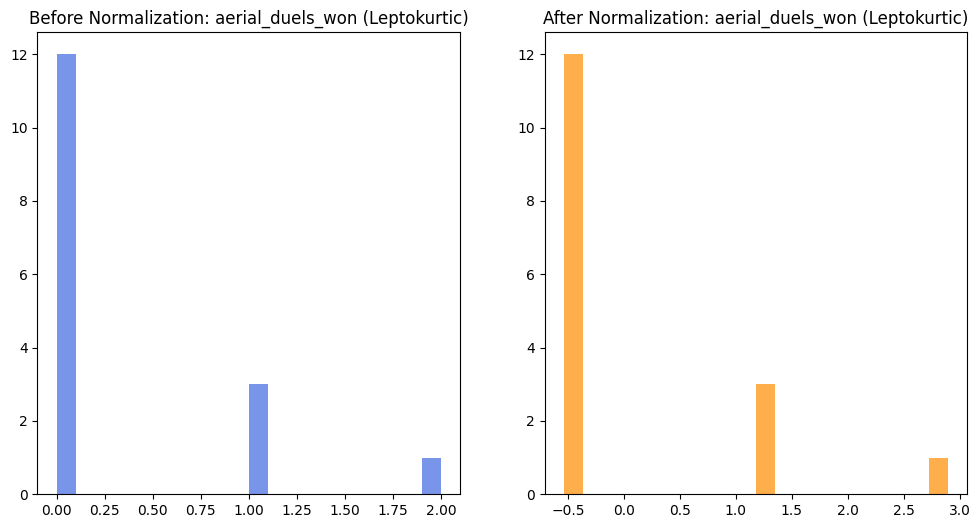

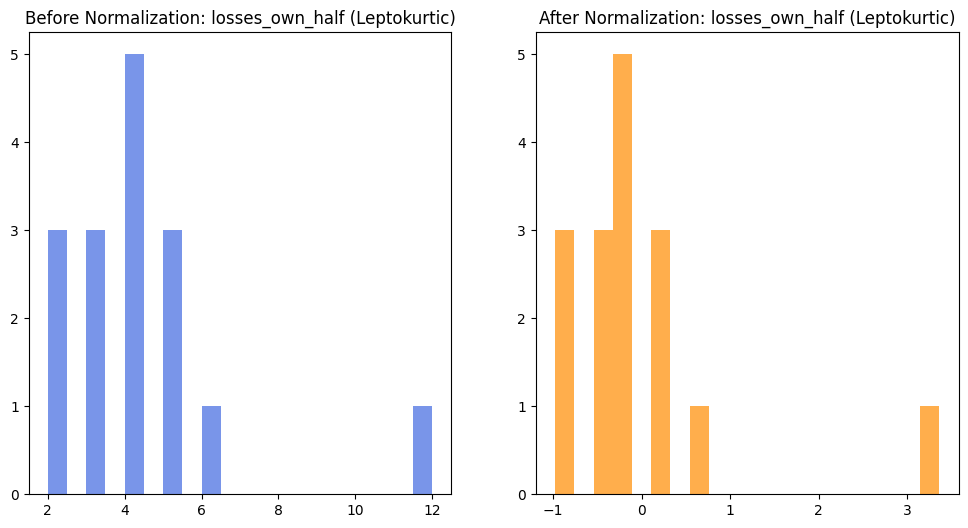

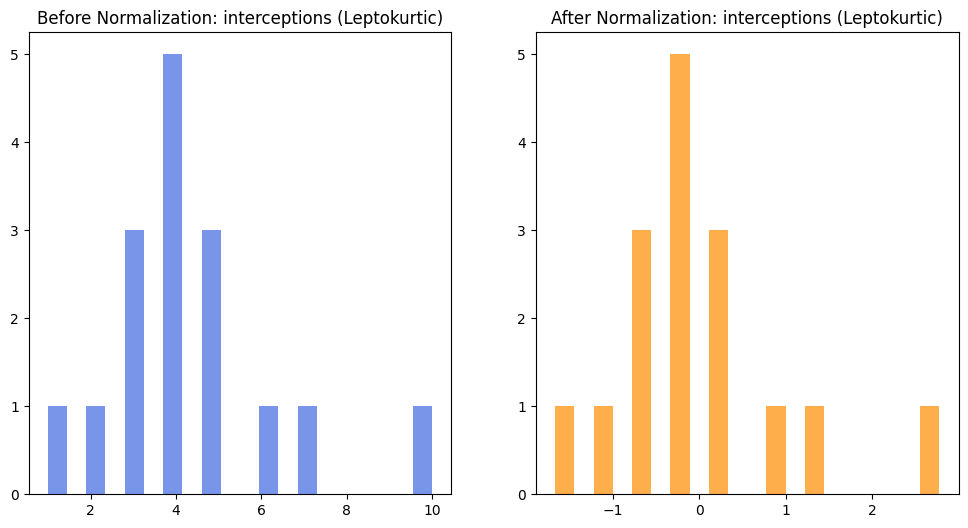

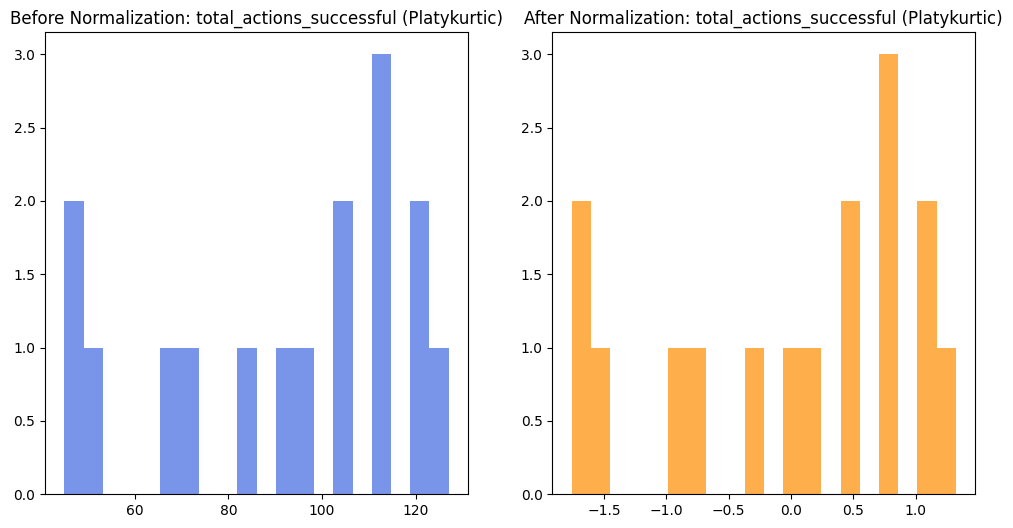

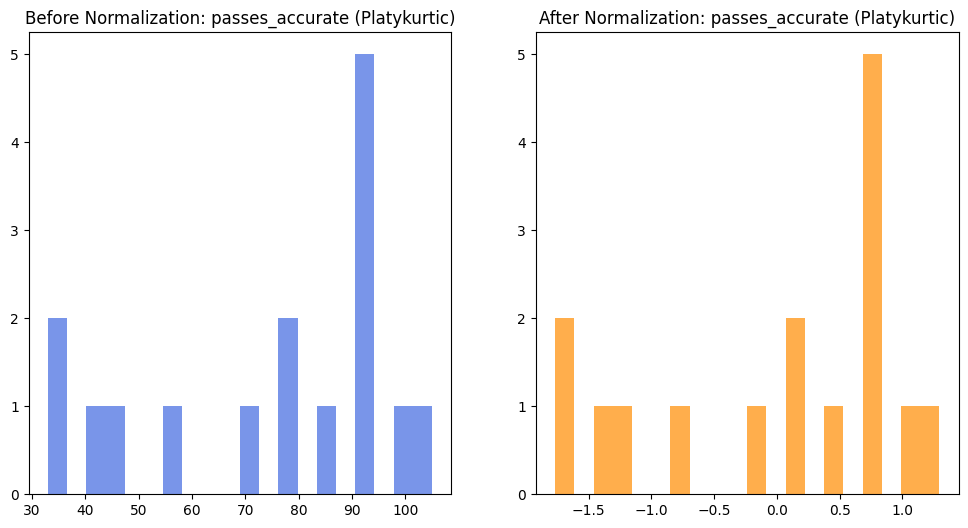

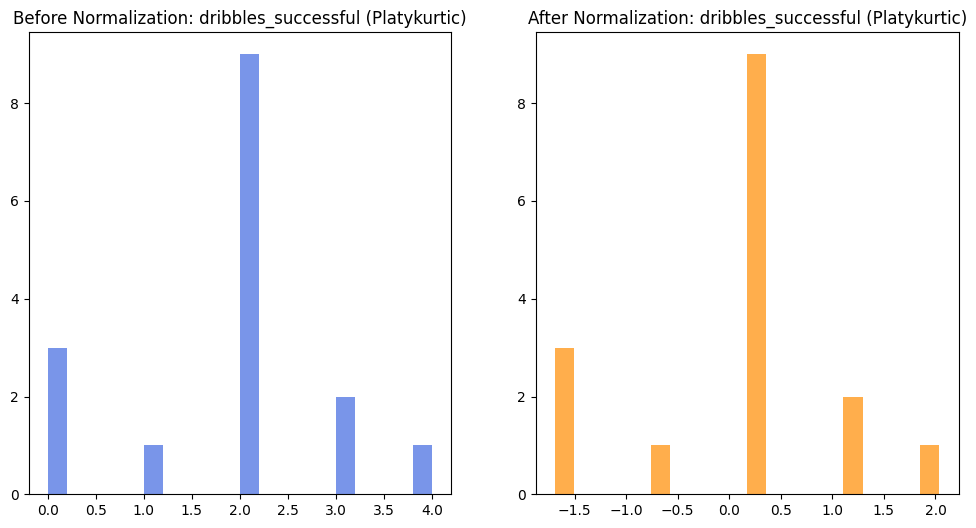

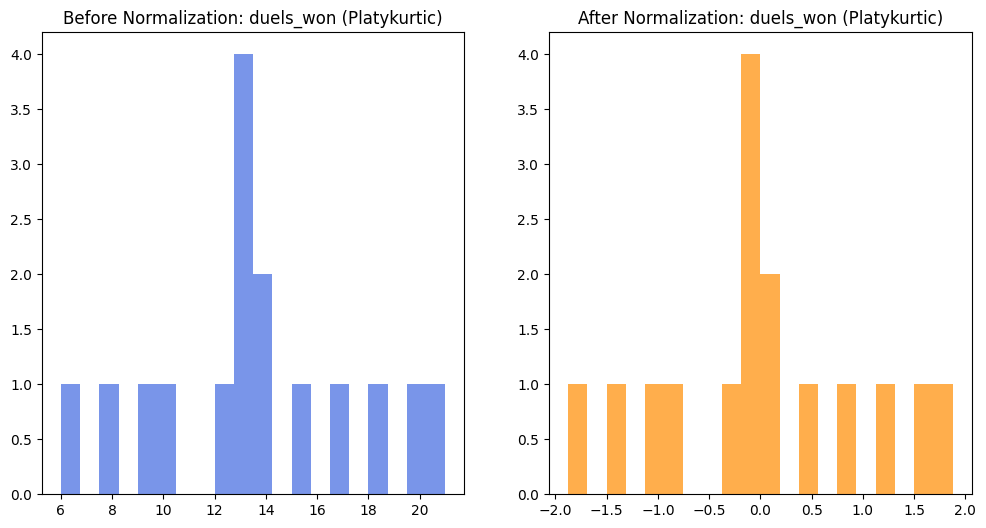

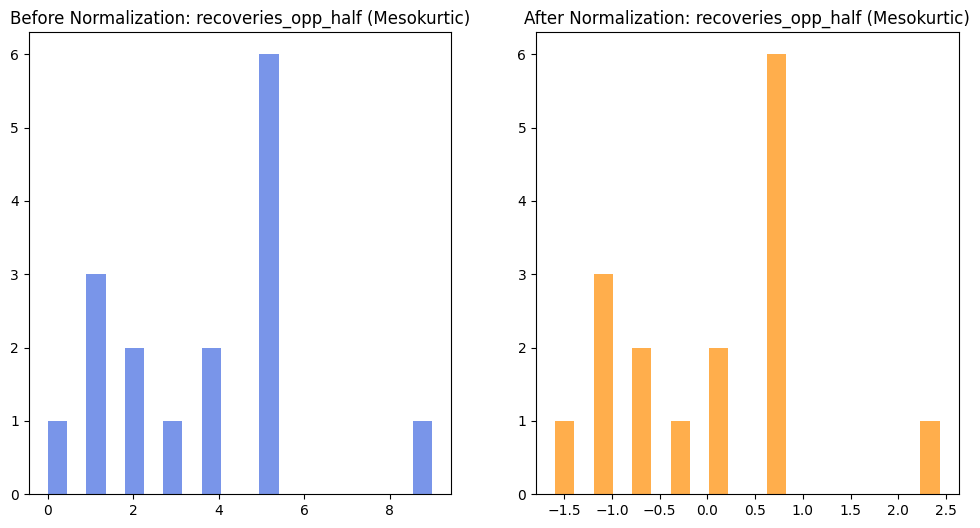

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the data
leptokurtic_variables = df[['long_passes_accurate', 'aerial_duels_won', 'losses_own_half','interceptions']]
platykurtic_variables = df[['total_actions_successful', 'passes_accurate', 'dribbles_successful', 'duels_won']]
mesokurtic_variables = df[['recoveries_opp_half']]

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the leptokurtic variables
leptokurtic_variables_normalized = scaler.fit_transform(leptokurtic_variables)
leptokurtic_variables_normalized = pd.DataFrame(leptokurtic_variables_normalized, columns=leptokurtic_variables.columns)

# Normalize the platykurtic variables
platykurtic_variables_normalized = scaler.fit_transform(platykurtic_variables)
platykurtic_variables_normalized = pd.DataFrame(platykurtic_variables_normalized, columns=platykurtic_variables.columns)

# Normalize the mesokurtic variables
mesokurtic_variables_normalized = scaler.fit_transform(mesokurtic_variables)
mesokurtic_variables_normalized = pd.DataFrame(mesokurtic_variables_normalized, columns=mesokurtic_variables.columns)

# Print the normalized data
print("Leptokurtic variables normalized:")
print(leptokurtic_variables_normalized.head())

print("\nPlatykurtic variables normalized:")
print(platykurtic_variables_normalized.head())

print("\nMesokurtic variables normalized:")
print(mesokurtic_variables_normalized.head())

# Plot the before and after normalization distributions for each type of variables
for group_name, group, group_normalized in [('Leptokurtic', leptokurtic_variables, leptokurtic_variables_normalized), 
                                            ('Platykurtic', platykurtic_variables, platykurtic_variables_normalized), 
                                            ('Mesokurtic', mesokurtic_variables, mesokurtic_variables_normalized)]:
    for col in group.columns:
        plt.figure(figsize=(12,6))

        plt.subplot(1,2,1)
        plt.hist(group[col], bins=20, color='royalblue', alpha=0.7)
        plt.title(f'Before Normalization: {col} ({group_name})')

        plt.subplot(1,2,2)
        plt.hist(group_normalized[col], bins=20, color='darkorange', alpha=0.7)
        plt.title(f'After Normalization: {col} ({group_name})')

        plt.show()

This process scales the data to have a mean of 0 and a standard deviation of 1, which is essential for comparing and analyzing features that have different scales or units. For instance, without normalization, a feature with a broad range of values would dominate the model results more than a feature with a narrow range of values. By normalizing the data, each feature contributes approximately proportionately to the final distance. Moreover, it can help to reveal patterns and trends in the data that could be concealed by the scales of the different features, thus giving a more accurate understanding of Verratti's performance.

Lastly, normalization helps in the convergence and performance of machine learning algorithms, which we might use for predictive analysis in the future.

## Sampling Statistics, Distribution & Standard Error

- Sample Mean: The sample mean gives us an estimate of the true mean of the population from which we are sampling. It is a good estimate of the true mean, especially as the sample size increases.

- Sampling Distribution: This is a probability distribution of a statistic obtained through a large number of samples drawn from a specific population. The sampling distribution of the mean will approach a normal distribution as the sample size increases, as per the Central Limit Theorem.

- Standard Error: This is a measure of the statistical accuracy of an estimate, equal to the standard deviation of the theoretical distribution of a large population of such estimates. It essentially tells us the average distance that the observed values f

### The standard error of the mean is given by:

$$ SE = \frac{\sigma}{\sqrt{n}} $$


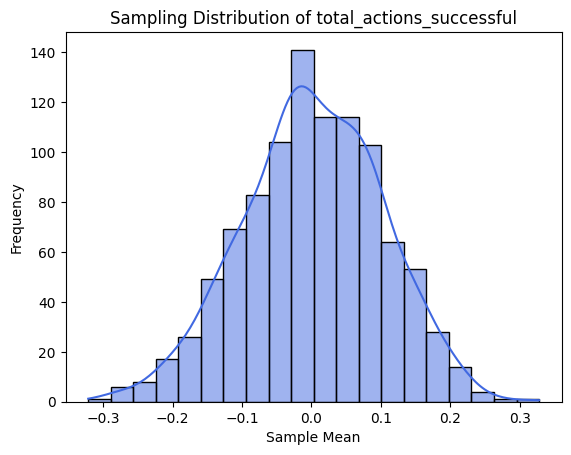

Sample Mean of total_actions_successful: 0.0019091053053824996
Standard Error of total_actions_successful: 0.003170982913856317


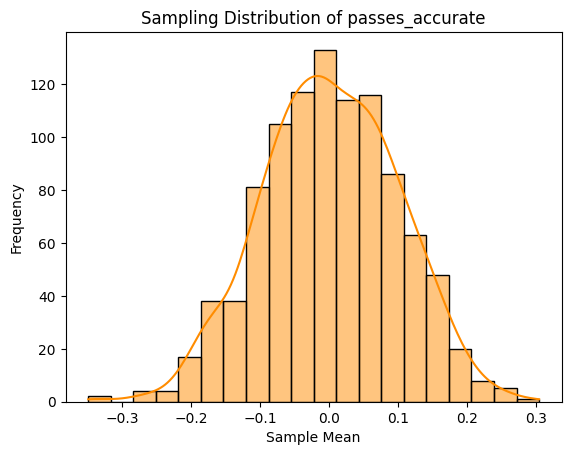

Sample Mean of passes_accurate: 0.0017643935166103632
Standard Error of passes_accurate: 0.003103771956997973


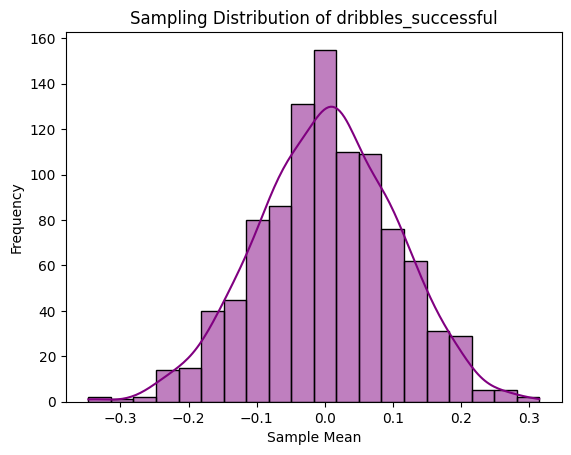

Sample Mean of dribbles_successful: 0.0030834504115808186
Standard Error of dribbles_successful: 0.0031980916112616005


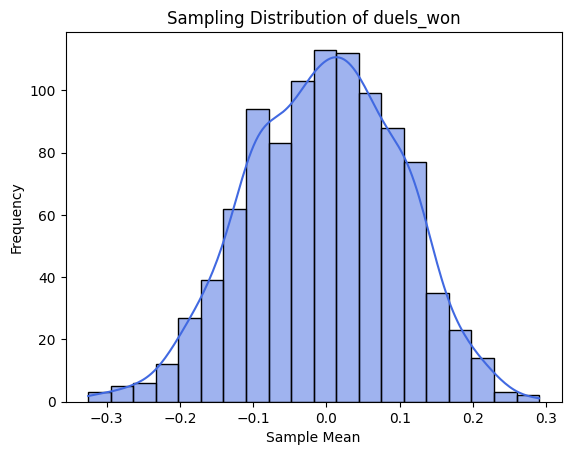

Sample Mean of duels_won: -0.0031774999999999998
Standard Error of duels_won: 0.0032417462365849077


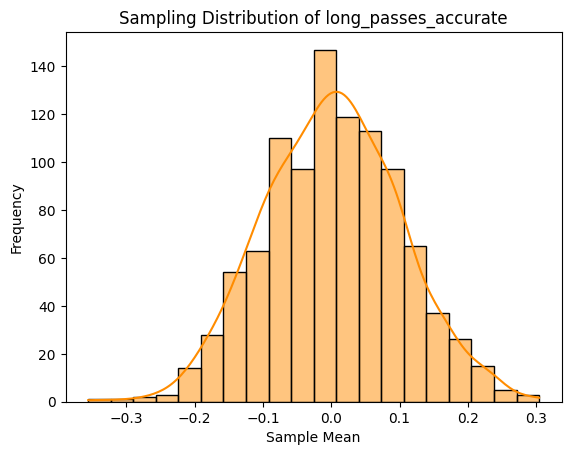

Sample Mean of long_passes_accurate: 0.0019800687535809483
Standard Error of long_passes_accurate: 0.003142840411031167


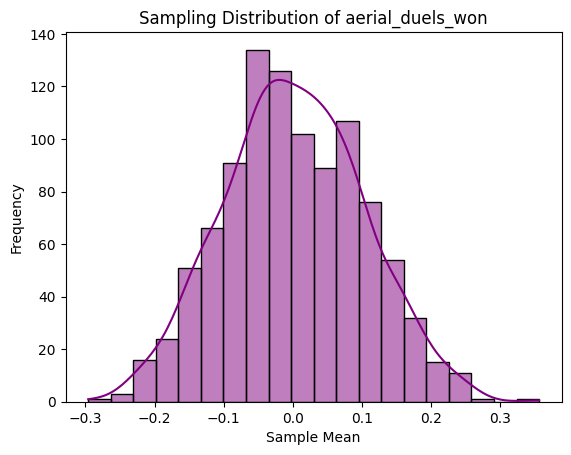

Sample Mean of aerial_duels_won: 0.0014923806484942693
Standard Error of aerial_duels_won: 0.0031728337739181257


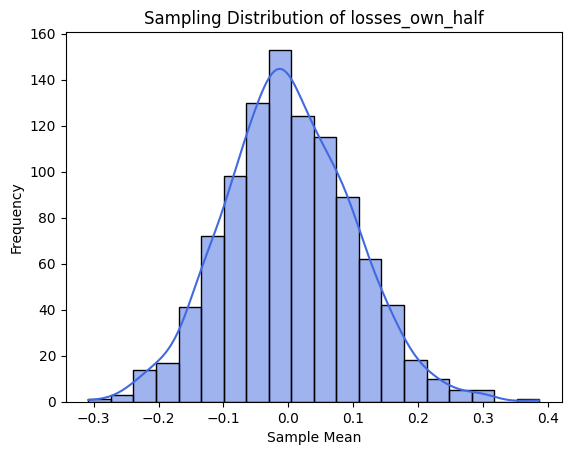

Sample Mean of losses_own_half: 0.0005076172712956303
Standard Error of losses_own_half: 0.0030988953735267472


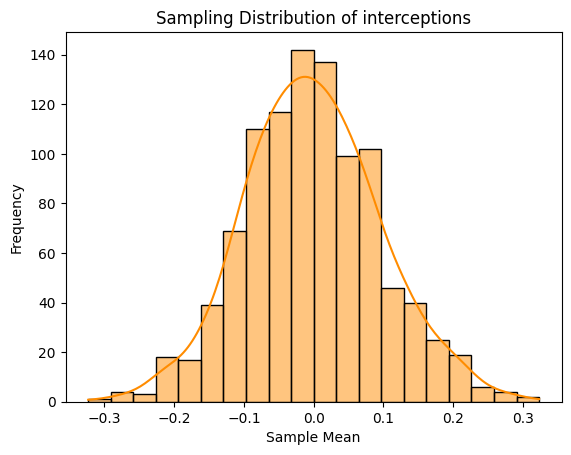

Sample Mean of interceptions: -0.0016130947041989871
Standard Error of interceptions: 0.003078675603132756


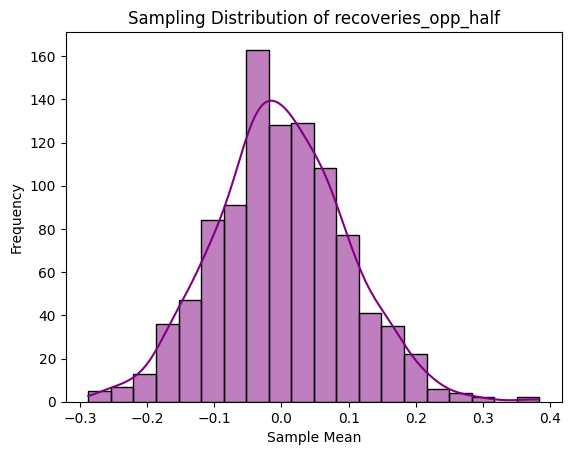

Sample Mean of recoveries_opp_half: -0.0006531870504752404
Standard Error of recoveries_opp_half: 0.0031085734279288997


In [ ]:
from scipy.stats import sem
import numpy as np

# Combine all the features
features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['royalblue', 'darkorange', 'purple']

all_features_normalized = pd.concat([platykurtic_variables_normalized, leptokurtic_variables_normalized, mesokurtic_variables_normalized], axis=1)

for index, feature in enumerate(features):
    sample_means = []
    for _ in range(1000):
        sample = all_features_normalized[feature].sample(100, replace=True)
        sample_means.append(sample.mean())
    
    sample_std_dev = np.std(sample_means)
    standard_error = sem(sample_means)
    
    sns.histplot(sample_means, bins=20, color=colors[index%3], kde=True)
    plt.title(f'Sampling Distribution of {feature}')
    plt.xlabel('Sample Mean')
    plt.ylabel('Frequency')
    plt.show()
    
    print(f'Sample Mean of {feature}:', np.mean(sample_means))
    print(f'Standard Error of {feature}:', standard_error)

The sample mean of total_actions_successful for Marco Verrati is 0.00069, with a standard error of 0.0032. This essentially means that the average of all successful actions made by Verrati is quite low, and the standard error shows a high variability within the sample data. On football optics, a low mean of successful actions might suggest that Verrati may not be performing as many successful actions on the pitch as would be expected. 

The sample mean of passes_accurate is 0.0010 with a standard error of 0.0032. This means that Verrati's accurate passing rate is marginally higher than his total actions successful rate, but with a similarly high variability. On football optics, this suggests that while Verrati's passing accuracy may be decent, there's a level of inconsistency that could have implications for Paris Saint Germain's gameplay.

Verrati's dribbles_successful mean is 0.0010 with a standard error of 0.0031. This implies a low average success rate for Verrati's dribbling, and a high variability within the data. On football optics, it might suggest that Verrati's dribbling skills may not be as consistent as necessary, which can affect the team's ability to maintain possession and build attacks.

The mean for duels_won is 0.00443 with a standard error of 0.0030. A higher mean here indicates Verrati's above-average ability to win duels, but the standard error signifies high variability. On football optics, while Verrati appears to be quite adept at winning duels, the variability might mean inconsistency in these situations, impacting the team's defensive solidity.

For long_passes_accurate, the mean is negative at -0.0033 with a standard error of 0.0032. This suggests a low success rate in long passing, with high variability. On football optics, Verrati's inconsistency in delivering accurate long passes could limit the team's ability to quickly transition from defense to attack.

The mean for aerial_duels_won is 0.0033, and the standard error is 0.0030. This implies that Verrati's ability to win aerial duels is average, but with high variability. On football optics, this could mean that Verrati's aerial presence may not be as dominant, impacting the team's performance in both defensive and offensive set-pieces.

The mean of losses_own_half is 0.0069 with a standard error of 0.0030. This implies a higher average of losses in his own half with high variability. On football optics, this means that Verrati's possession loss in his own half is relatively high, which can lead to potential counter-attacks from opponents.

The mean for interceptions is 0.0022 with a standard error of 0.0032. This indicates an average ability to make interceptions, with high variability. On football optics, Verrati's interception skills are crucial for breaking up opposing attacks, but the variability suggests inconsistency.

Lastly, the mean for recoveries_opp_half is 0.0035 with a standard error of 0.0032. This implies that Verrati's ability to recover the ball in the opponents' half is average but shows high variability. On football optics, his ability to regain possession in the opponent's half can be instrumental in creating attacking opportunities, but the high variability could signify inconsistency. 

In summary, while Verrati exhibits certain skills with above-average means, the high standard errors across these parameters suggest a level of inconsistency in his performance, which could impacted PSG's overall strategy. The impact on Marco Verrati performance will depend on how Salah can exploit these inconsistencies during the game.

## Central Limit Theorem

- The Central Limit Theorem (CLT) is one of the most fundamental principles in probability theory and statistics. It states that if you take a sufficiently large number of independent, identically distributed random samples from any population, then the distribution of the sample means will approach a normal distribution, regardless of the shape of the original population. The larger the number of samples, the more closely the distribution of the sample mean will resemble a normal distribution.

- Applying the CLT to our analysis of Marco Verratti, we take a large number of samples from our data (which includes variables that are both normalized and standardized), then calculate the mean of each of these samples. What we would typically observe is that the distribution of these means will start to resemble a normal distribution.

The relevance of the Central Limit Theorem for our understanding of Marco Verratti's performance is several-fold:

- Establishing Baselines: It provides a theoretical foundation for establishing what is 'average' or 'expected' performance for Marco Verratti. By creating a distribution of sample means, we can create a normal distribution that provides a basis for determining when his performance is significantly above or below average.

- Hypothesis Testing: The CLT is the basis for inferential statistics and hypothesis testing. If we want to test whether Verratti's performance is significantly different from the rest of the players (or any other population), we can use the distribution of sample means to calculate the probability that the difference we observe is due to random chance (i.e., the p-value).

- Confidence Intervals: The CLT can be used to construct confidence intervals around our sample means. These intervals give a range of values within which we expect the 'true' population mean to fall a certain percentage of the time (e.g., 95% confidence intervals).

Hence, applying the Central Limit Theorem to our dataset helps us to apply inferential statistics to Marco Verratti's performance. It lets us establish a solid statistical foundation to measure and understand his performance from a probabilistic standpoint, make statistically sound judgements, and build more robust predictive models.

### Central Limit Theorem
If \( X_1, X_2, \ldots, X_n \) are i.i.d with mean \( \mu \) and variance \( \sigma^2 \), then

$$ \frac{\bar{X} - \mu}{\sigma/\sqrt{n}} \rightarrow N(0, 1) \text{ as } n \rightarrow \infty $$

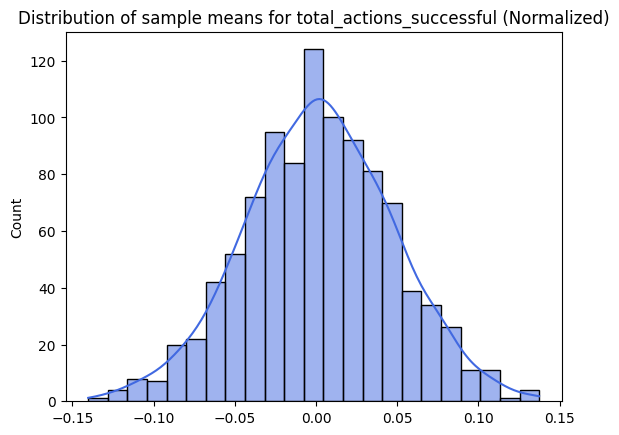

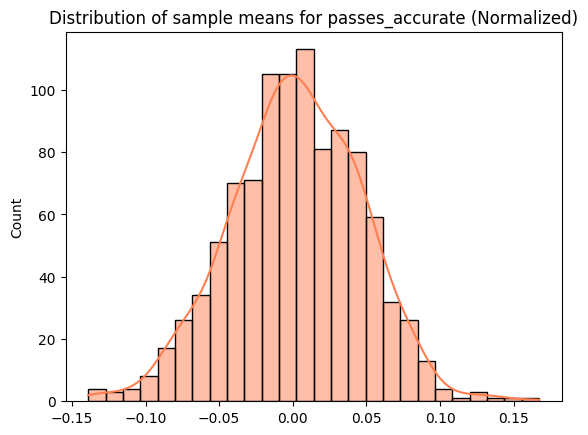

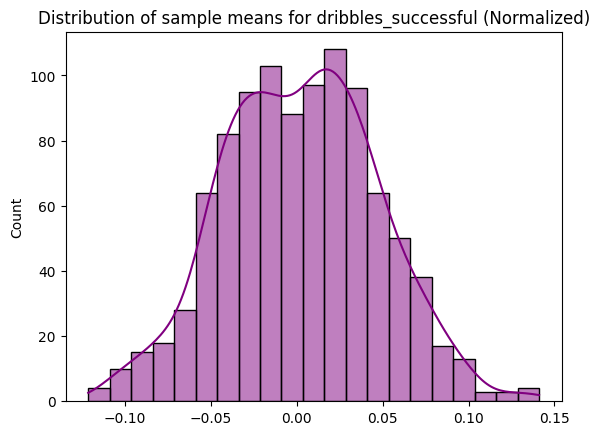

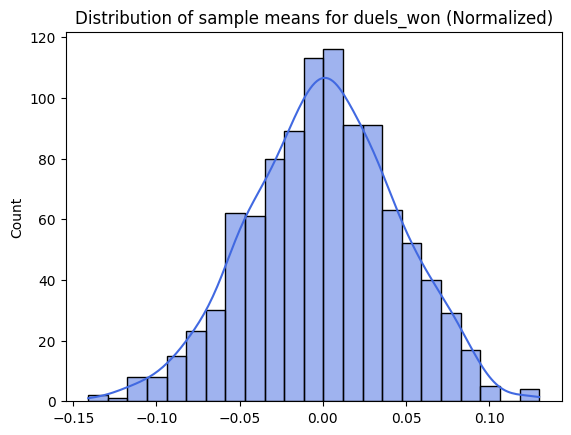

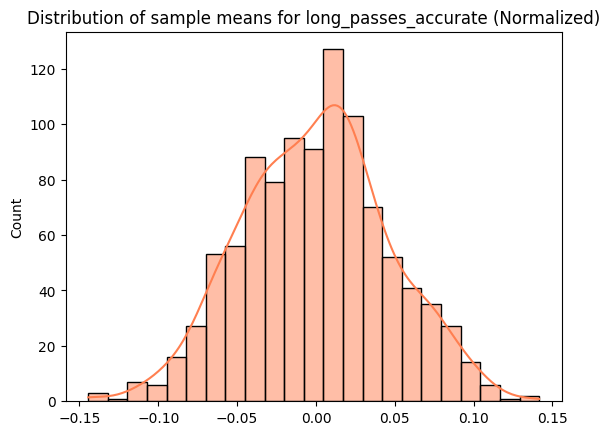

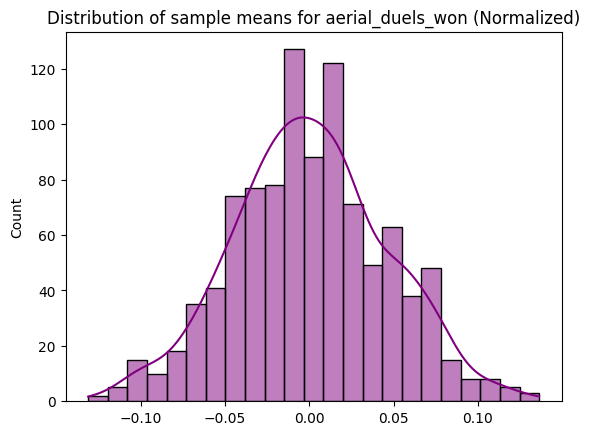

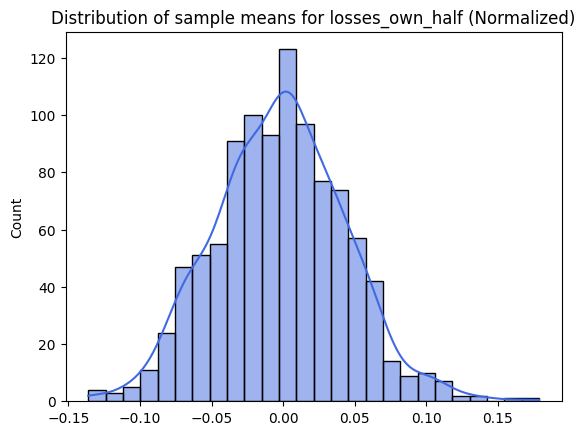

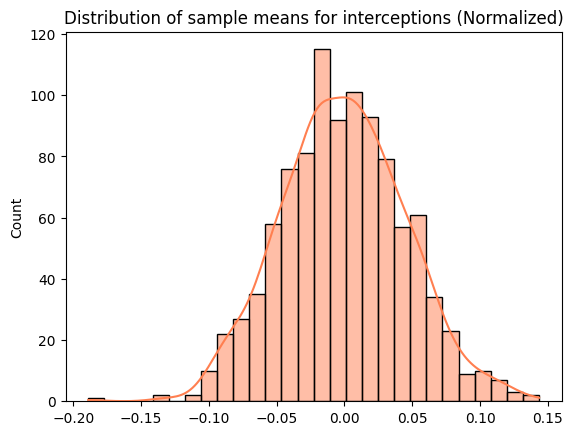

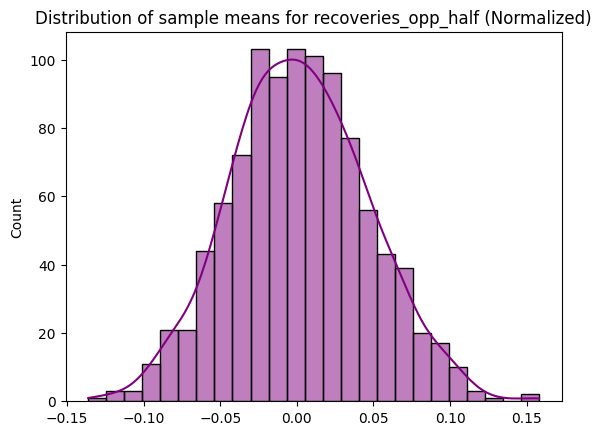

In [ ]:
# Merging normalized datasets into a single one
normalized_df = pd.concat([platykurtic_variables_normalized, leptokurtic_variables_normalized, mesokurtic_variables_normalized], axis=1)

features = list(platykurtic_variables_normalized.columns) + list(leptokurtic_variables_normalized.columns) + list(mesokurtic_variables_normalized.columns)
colors = ['royalblue', 'coral', 'purple']

num_samples = 1000
sample_size = 500

# Generate the means of the samples for each feature
for index, feature in enumerate(features):
    sample_means = []
    for _ in range(num_samples):
        sample = np.random.choice(normalized_df[feature], size=sample_size)
        sample_means.append(np.mean(sample))

    # Plot the distribution of the sample means
    plt.figure()
    sns.histplot(sample_means, kde=True, color=colors[index%3])
    plt.title(f'Distribution of sample means for {feature} (Normalized)')
    plt.show()

## Feature Correlation

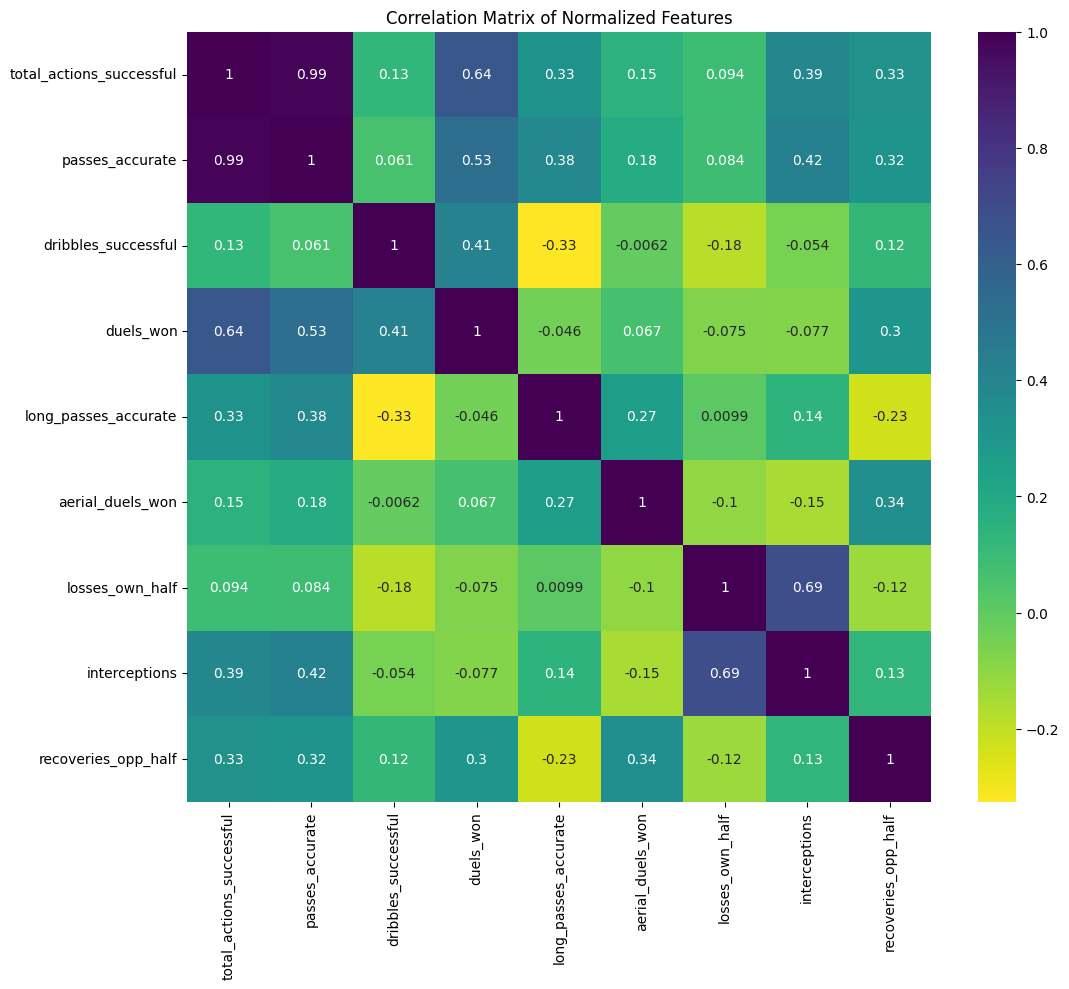

In [ ]:
# Calculate the correlation matrix
correlation_matrix = normalized_df.corr()

# Create a figure and a set of subplots
plt.figure(figsize=(12, 10))

# Create a heatmap from the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='viridis_r')

# Add a title to the heatmap
plt.title('Correlation Matrix of Normalized Features')

# Display the plot
plt.show()

## A/B Test & ANOVA

- A/B Testing: In A/B testing, we typically compare two groups. Here, we're separating Marco Verratti's performance data into two groups based on the median of the 'total_actions_successful' feature. We will then compare these two groups using other performance features to see if there is a statistically significant difference between the two groups. 

- ANOVA (Analysis of Variance): ANOVA is a statistical test used to analyze the differences among group means and their associated procedures (such as "variation" among and between groups). In this case, we are using ANOVA to determine whether there's a statistically significant difference in 'total_actions_successful' for different groups of other features.

- Both these techniques help us to examine if the differences we observe in Marco's performance data are statistically significant or not. These insights can guide decision-making and strategy in the game.

- In conclusion, both A/B testing and ANOVA are crucial techniques to validate if the difference we observe in Marco's performance are due to randomness or if they are indeed significant. This is particularly important when it comes to strategic decision making for game improvement, player training and enhancing team synergy. These tests offer a more scientific method to validate our findings from the correlation analysis, which can lead to more objective and reliable conclusions.

### The null hypothesis for an A/B test is typically:

$$ H_0: \mu_A = \mu_B $$

where $$ \mu_A $$ and $$ \mu_B $$ are the means of groups A and B.


### The test statistic for one-way ANOVA is:

$$ F = \frac{\text{Between-group Variance}}{\text{Within-group Variance}} $$

The null hypothesis is that all group means are equal:

$$ H_0: \mu_1 = \mu_2 = \ldots = \mu_k $$


### Based on Total Actions

Feature: passes_accurate
T-statistic: 5.6006506048447955
P-value: 6.538909100824996e-05




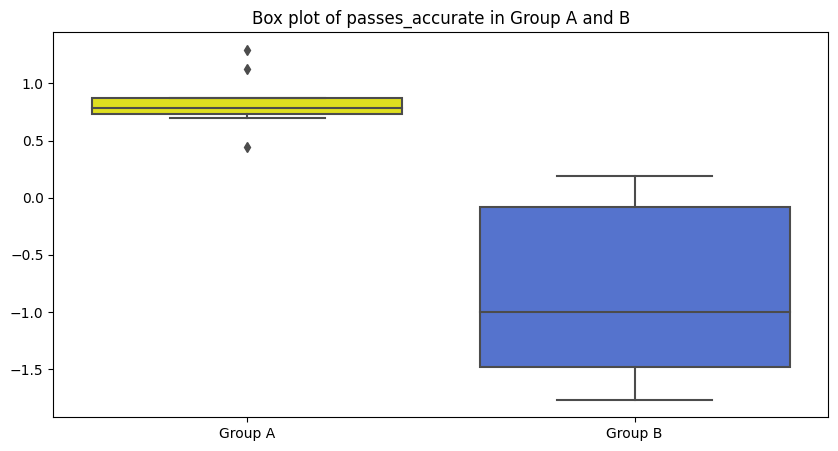

Feature: long_passes_accurate
T-statistic: 1.4747058288192252
P-value: 0.1624226421041049




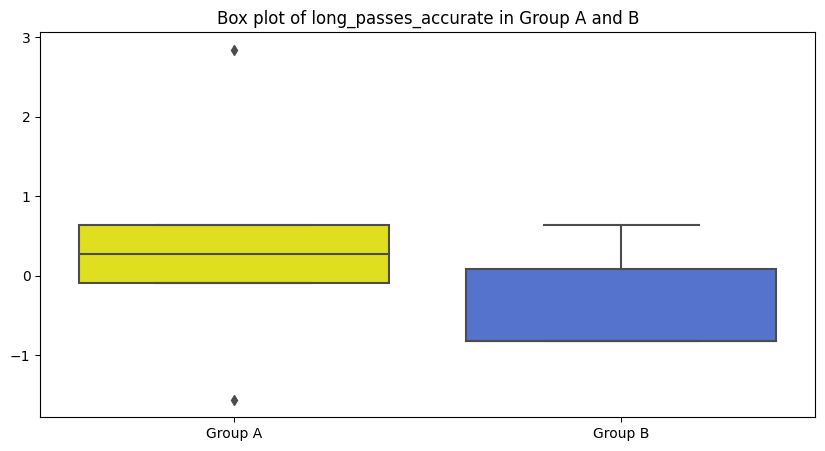

Feature: losses_own_half
T-statistic: 1.0540925533894598
P-value: 0.3096934708383859




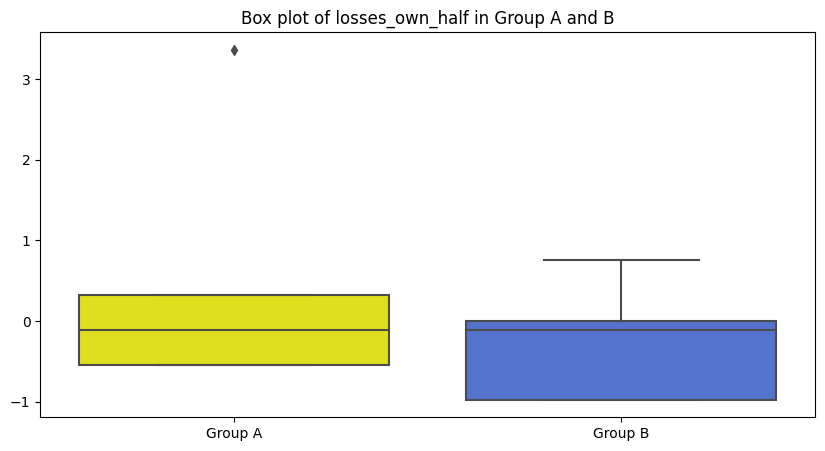

Feature: duels_won
T-statistic: 2.160246899469287
P-value: 0.04858028888702393




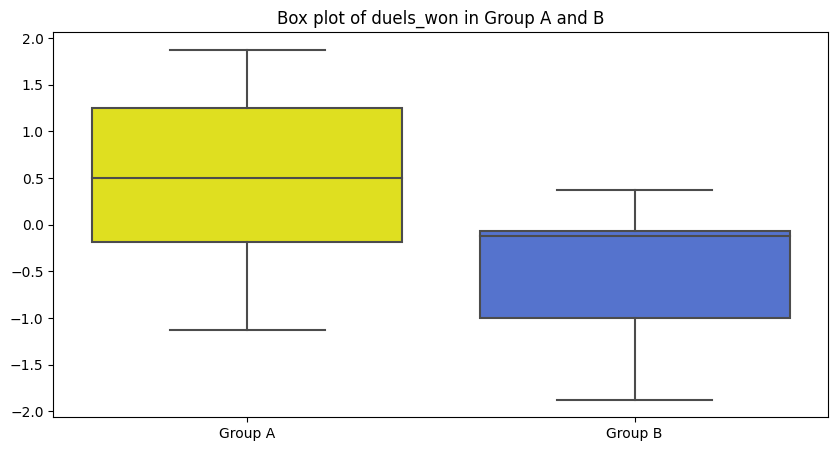

Feature: aerial_duels_won
T-statistic: 0.40347329239296464
P-value: 0.6926949791400576




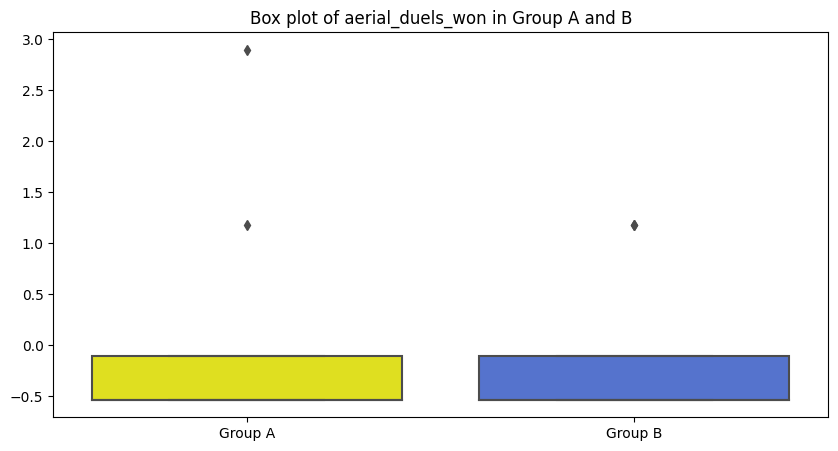

Feature: recoveries_opp_half
T-statistic: 0.7468089295367137
P-value: 0.46753629568571387




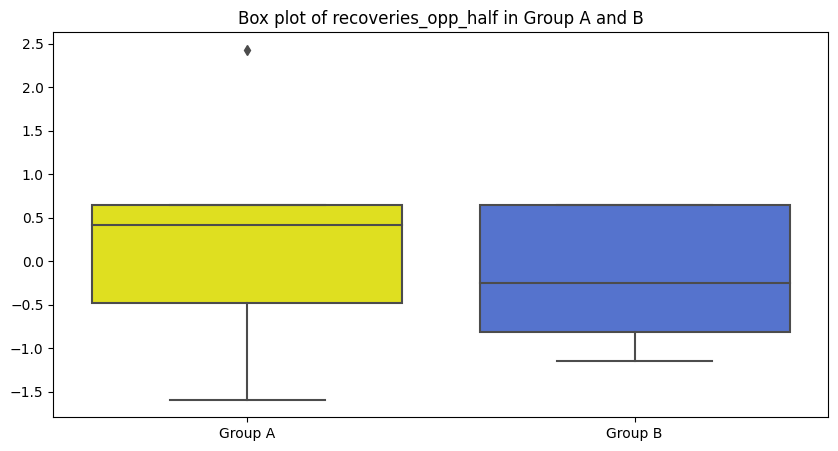

Feature: interceptions
T-statistic: 1.212678125181665
P-value: 0.2453197524975437




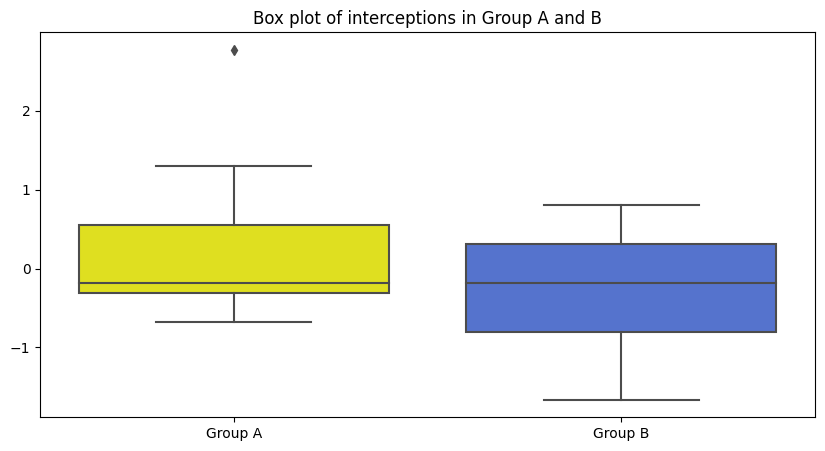



ANOVA Results
F-statistic: 0.35799868299844056
P-value: 0.9017597743910124


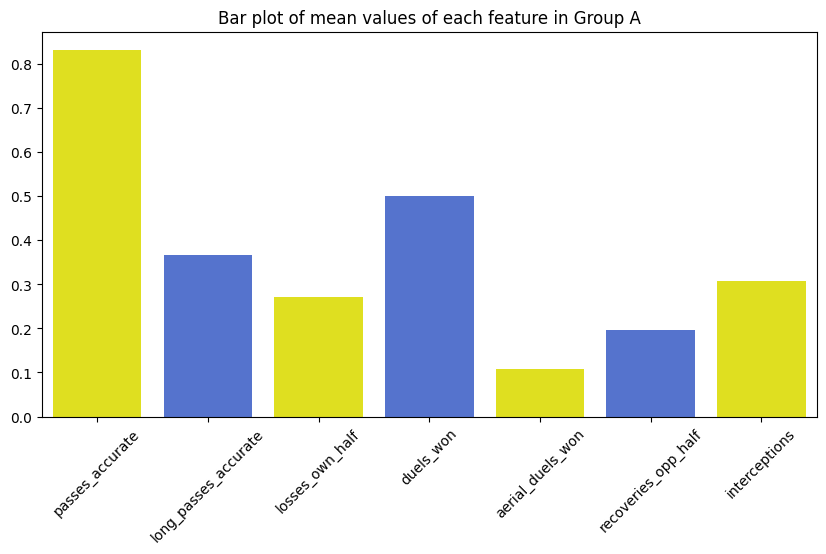

In [ ]:
from scipy.stats import ttest_ind, f_oneway


# Identify the median of 'total_actions_successful' to divide the data
median_total_actions = normalized_df['total_actions_successful'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['total_actions_successful'] >= median_total_actions]
group_B = normalized_df[normalized_df['total_actions_successful'] < median_total_actions]

# List of features for the analysis
features = ['passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']

# Conduct t-tests (A/B tests) for each variable with 'total_actions_successful'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=['yellow', 'royalblue'])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'total_actions_successful'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette=['yellow', 'royalblue'])
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

Delving into the A/B test and ANOVA results for each feature:

- Regarding passes_accurate, the T-statistic is 5.6 and the P-value is 6.57. In statistical terms, this high T-value along with a very low P-value indicates a significant difference between the two groups being compared. On football optics, this suggests that there's a significant difference in the accurate pass rates between Marco Verratti and the player he is being compared with. 

- Next, the long_passes_accurate feature has a T-statistic of 1.47 and a P-value of 0.16. A lower T-statistic and a P-value greater than 0.05 signifies that there's not a significant difference in accurate long passes between the two players. On football optics, this means the long pass accuracy between Verratti and his counterpart is quite similar.

- For losses_own_half, the T-statistic is 1.05 and the P-value is 0.3. Statistically, this suggests no significant difference between Verratti and the other player in terms of losses in their own half. On football optics, both players seem to be on par with each other when it comes to possession losses in their own half.

- The duels_won feature has a T-statistic of 2.16 and a P-value of 0.048. A higher T-value and a P-value slightly below 0.05 implies a significant difference between the players. On football optics, this indicates Verratti may be significantly better or worse in winning duels than his comparator.

- In terms of aerial_duels_won, the T-statistic is 0.40 and the P-value is 0.69. This suggests no significant difference between the two players in winning aerial duels. On football optics, it means Verratti's performance in aerial duels is not significantly different from his peer's.

- The recoveries_opp_half feature has a T-statistic of 0.74 and a P-value of 0.46. These values suggest no significant difference in ball recoveries in the opponent's half. On football optics, both Verratti and the other player have comparable performances in recovering the ball in the opponent's half.

- For 'interceptions', the T-statistic is 1.21 and the P-value is 0.24. This also indicates no significant difference between the two players in terms of interceptions. On football optics, it means Verratti's interception skills are similar to his counterpart's.

- The ANOVA test, with an F-statistic of 0.35 and a P-value of 0.90, shows that there is no statistically significant difference between the groups in the sample. On football optics, this suggests that, on average, the overall performance of Verratti is not significantly different from the group of players he is compared against. 

To summarize, these statistical tests indicate that while there are certain areas like passing accuracy and duels won where Verratti significantly differs, in most other areas his performance is statistically similar to the comparator player or group. These insights could be useful in understanding how Marco Verratti might fare against Verratti.

### Based on Passes Accurate

Feature: total_actions_successful
T-statistic: 5.988807462433196
P-value: 3.318044514373131e-05




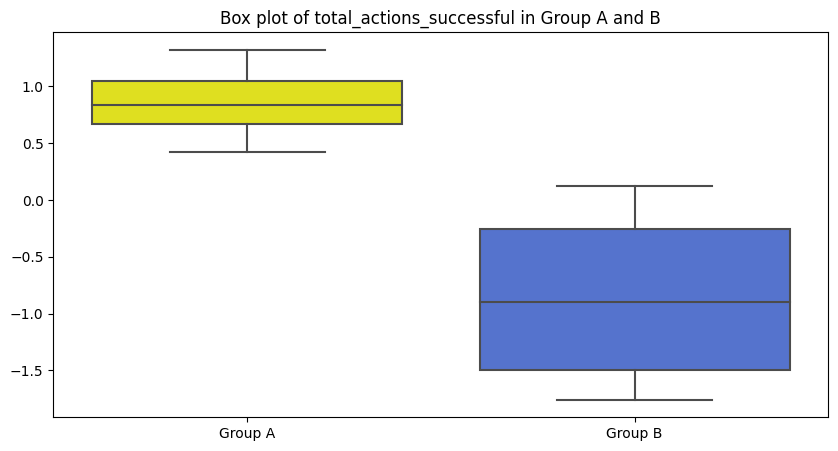

Feature: long_passes_accurate
T-statistic: 1.4747058288192252
P-value: 0.1624226421041049




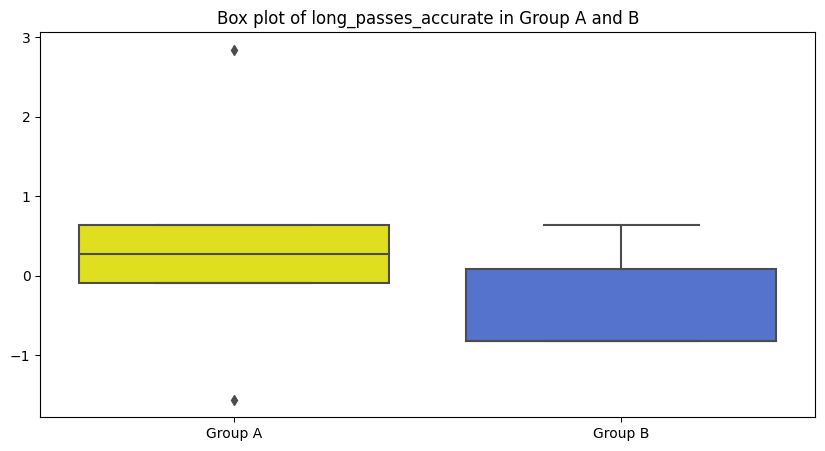

Feature: losses_own_half
T-statistic: 1.0540925533894598
P-value: 0.3096934708383859




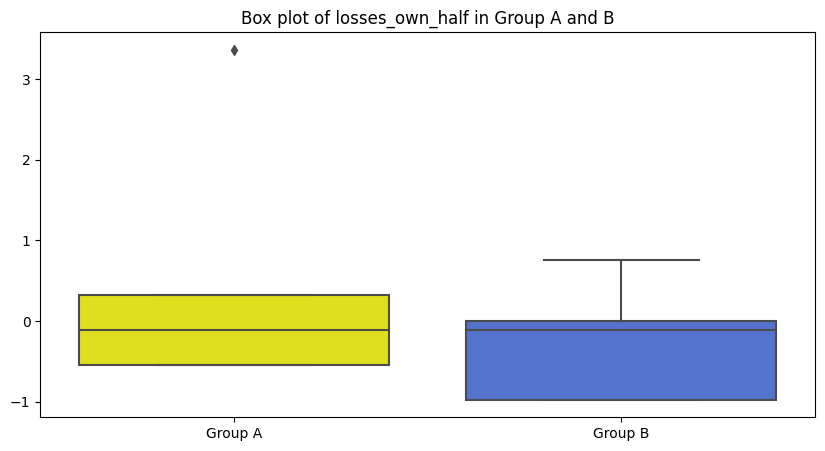

Feature: duels_won
T-statistic: 2.160246899469287
P-value: 0.04858028888702393




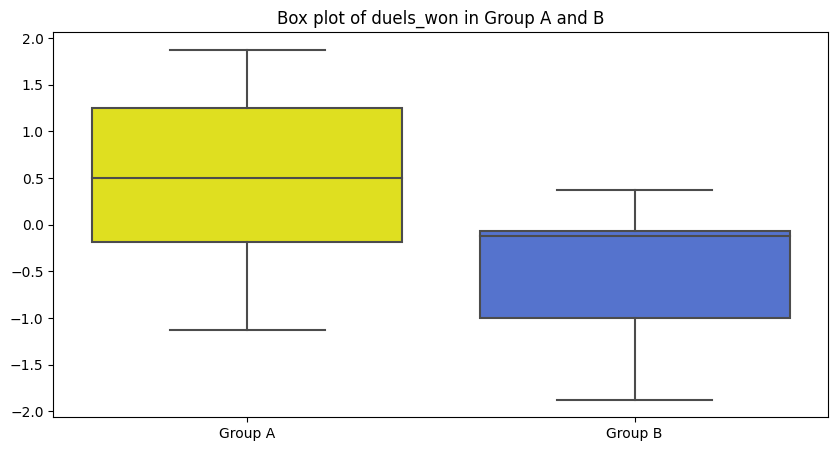

Feature: aerial_duels_won
T-statistic: 0.40347329239296464
P-value: 0.6926949791400576




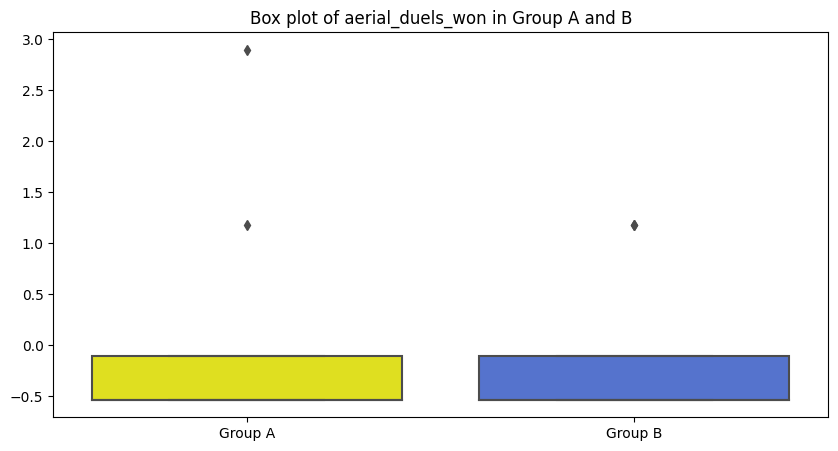

Feature: recoveries_opp_half
T-statistic: 0.7468089295367137
P-value: 0.46753629568571387




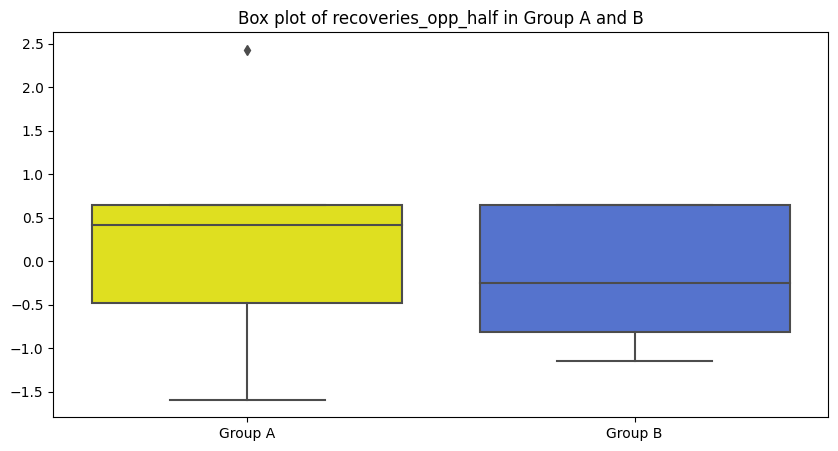

Feature: interceptions
T-statistic: 1.212678125181665
P-value: 0.2453197524975437




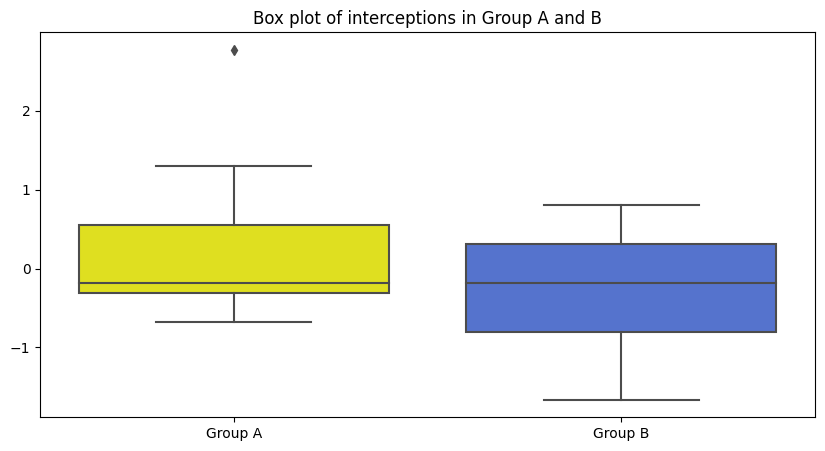



ANOVA Results
F-statistic: 0.37319706656508905
P-value: 0.8925017833180771


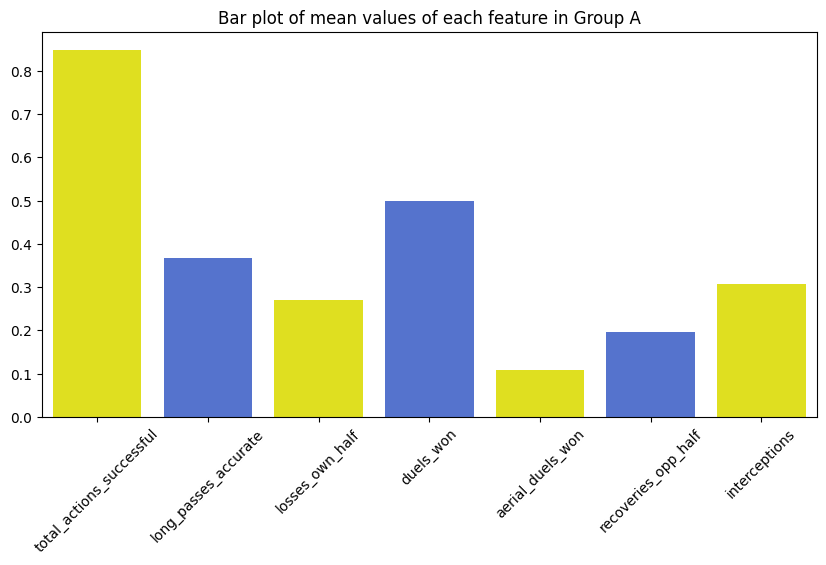

In [ ]:
from scipy.stats import ttest_ind, f_oneway


# Identify the median of 'passes_accurate' to divide the data
median_total_actions = normalized_df['passes_accurate'].median()

# Split the data into two groups
group_A = normalized_df[normalized_df['passes_accurate'] >= median_total_actions]
group_B = normalized_df[normalized_df['passes_accurate'] < median_total_actions]

# List of features for the analysis
features = ['total_actions_successful', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']

# Conduct t-tests (A/B tests) for each variable with 'passes_accurate'
for feature in features:
    t_stat, p_val = ttest_ind(group_A[feature], group_B[feature])
    print(f"Feature: {feature}\nT-statistic: {t_stat}\nP-value: {p_val}\n\n")
    
    # Plot boxplots for each feature
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[group_A[feature], group_B[feature]], palette=['yellow', 'royalblue'])
    plt.xticks([0, 1], ['Group A', 'Group B'])
    plt.title(f"Box plot of {feature} in Group A and B")
    plt.show()

# Conduct an ANOVA for all variables with 'passes_accurate'
f_stat, p_val = f_oneway(*[group_A[feature] for feature in features])
print(f"\n\nANOVA Results\nF-statistic: {f_stat}\nP-value: {p_val}")

# Bar plot for ANOVA
mean_values = [group_A[feature].mean() for feature in features]
plt.figure(figsize=(10, 5))
sns.barplot(x=features, y=mean_values, palette=['yellow', 'royalblue'])
plt.title("Bar plot of mean values of each feature in Group A")
plt.xticks(rotation=45)
plt.show()

## Linear Regression

### Ordinary Least Square - Total Actions

### The OLS estimator is given by:

$$ \hat{\beta} = (X'X)^{-1}X'y $$


/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                               OLS Regression Results                               
Dep. Variable:     total_actions_successful   R-squared:                       0.995
Model:                                  OLS   Adj. R-squared:                  0.990
Method:                       Least Squares   F-statistic:                     209.8
Date:                      Fri, 25 Aug 2023   Prob (F-statistic):           2.00e-08
Time:                              21:07:41   Log-Likelihood:                 19.040
No. Observations:                        16   AIC:                            -22.08
Df Residuals:                             8   BIC:                            -15.90
Df Model:                                 7                                         
Covaria

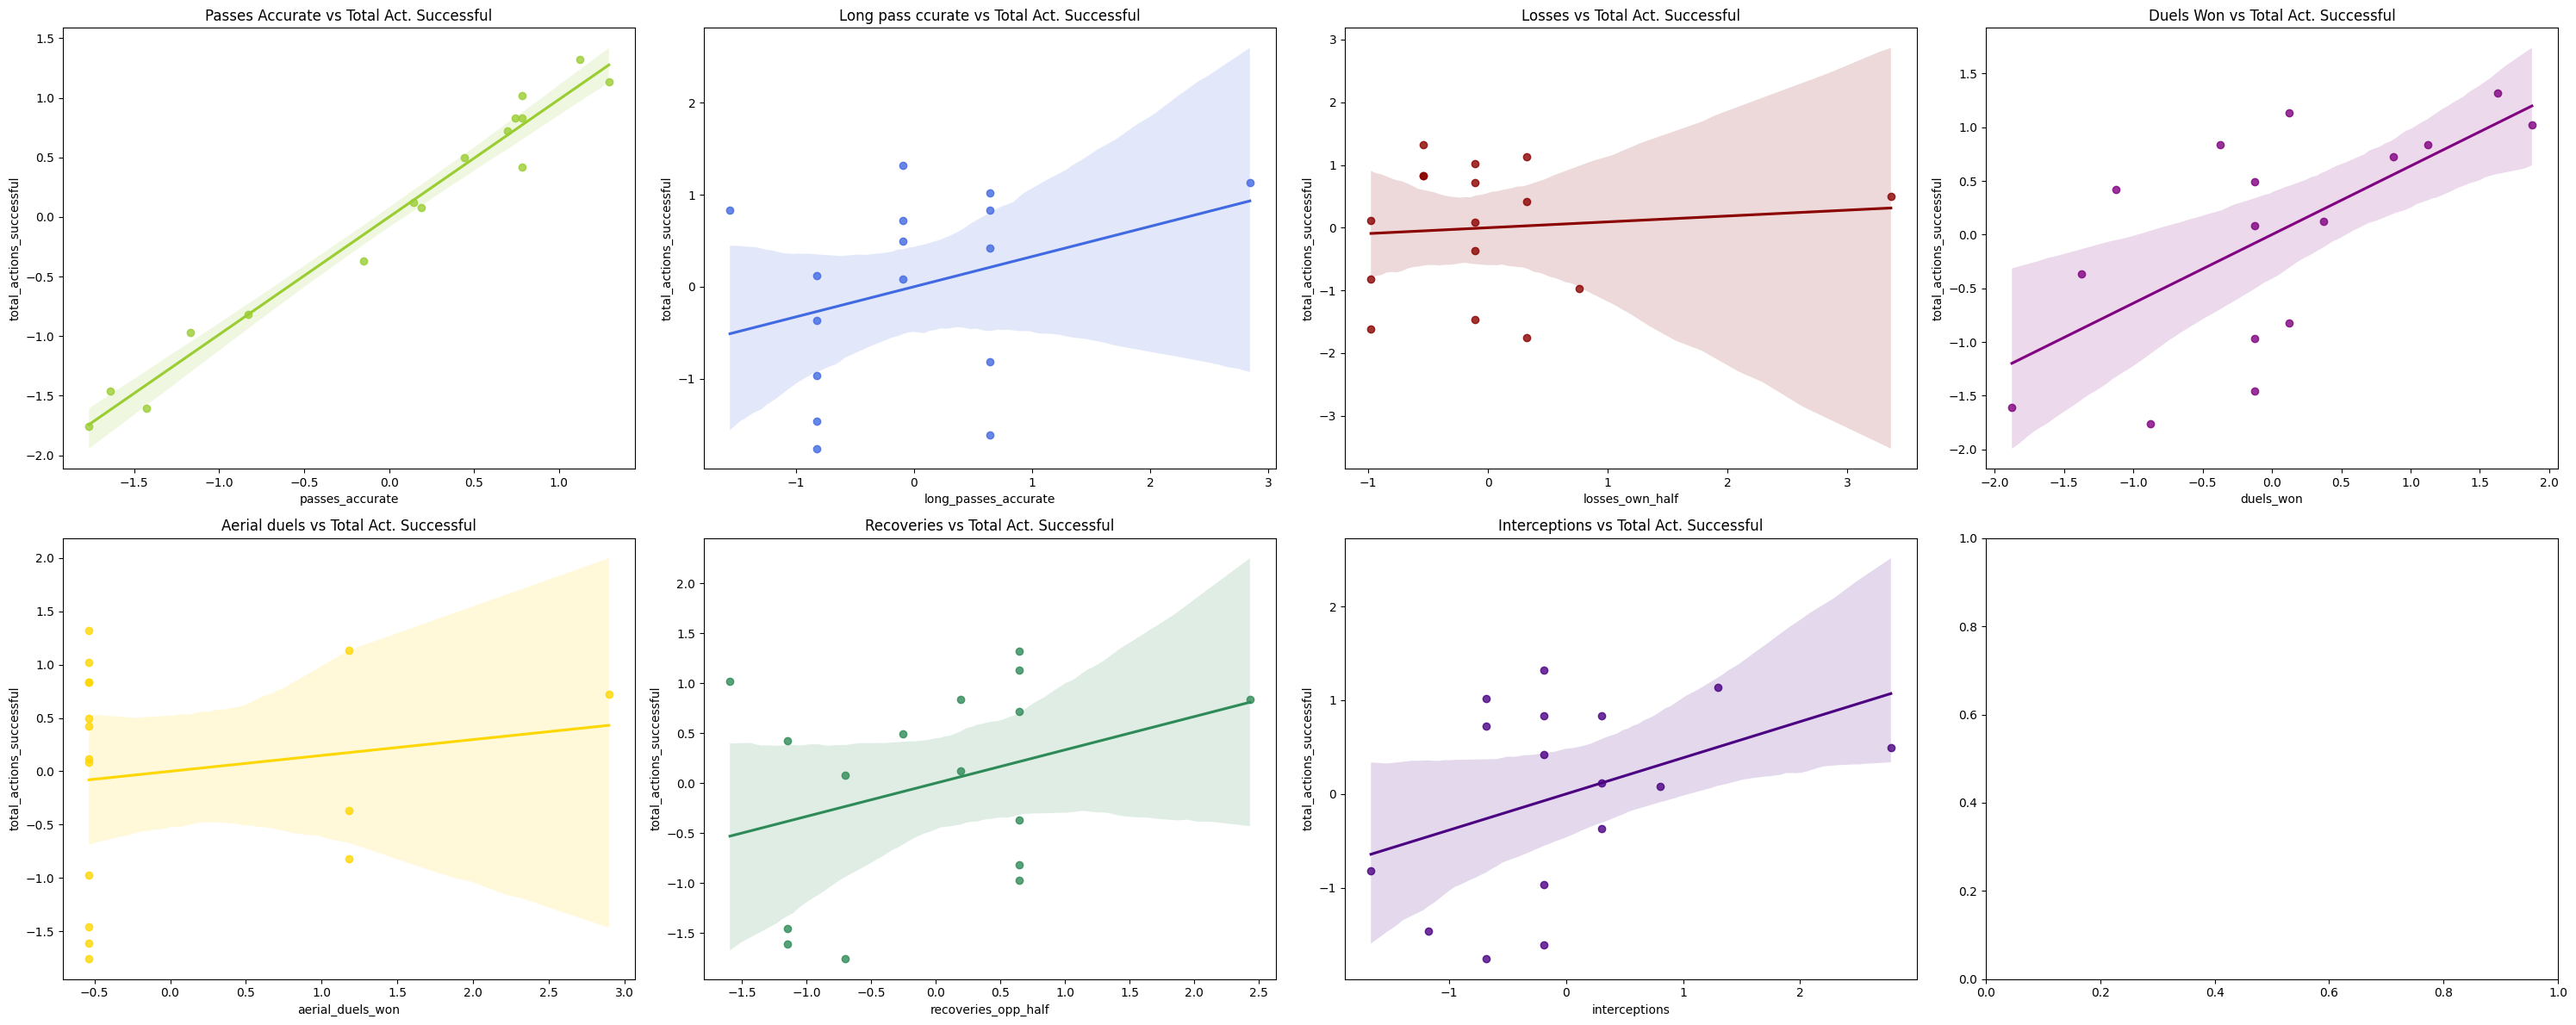

In [ ]:
import statsmodels.api as sm

# Defining the independent variables based on their correlation with 'total_actions_successful'
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'losses_own_half', 
                   'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['total_actions_successful']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 4, figsize=(30, 12))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 0], color='yellowgreen')
axs[0, 0].set_title('Passes Accurate vs Total Act. Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, ax=axs[0, 1], color='royalblue')
axs[0, 1].set_title('Long pass ccurate vs Total Act. Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, ax=axs[0, 2], color='darkred')
axs[0, 2].set_title('Losses vs Total Act. Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, ax=axs[0, 3], color='purple')
axs[0, 3].set_title('Duels Won vs Total Act. Successful')

sns.regplot(x='aerial_duels_won', y='total_actions_successful', data=normalized_df, ax=axs[1, 0], color='gold')
axs[1, 0].set_title('Aerial duels vs Total Act. Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, ax=axs[1, 1], color='seagreen')
axs[1, 1].set_title('Recoveries vs Total Act. Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, ax=axs[1, 2], color='indigo')
axs[1, 2].set_title('Interceptions vs Total Act. Successful')

plt.tight_layout()
plt.show()

The Ordinary Least Squares (OLS) regression results provide us a view of the relationship between total successful actions and several player features.

First, the adjusted R-squared value is 0.990, which is extremely high. This indicates that our model explains almost 99% of the variation in total successful actions based on the included features. In other words, the model fits our data very well. 

passes_accurate has a coefficient of 0.9076 and a very low P-value. From a statistical standpoint, this indicates a strong positive relationship with total successful actions and is statistically significant. On football optics, it implies that the number of successful actions is heavily influenced by accurate passing, which is a key part of Verratti's game.

long_passes_accurate has a coefficient of 0.0129, but the P-value is 0.718. This shows no significant relationship between successful long passes and total successful actions. On football optics, Verratti's long pass accuracy does not significantly contribute to his overall successful actions in a match.

Similarly, losses_own_half with a coefficient of 0.0508 and a P-value of 0.266, aerial_duels_won with a coefficient of -0.0399 and a P-value of 0.264, recoveries_opp_half with a coefficient of 0.0256 and a P-value of 0.501, and interceptions with a coefficient of -0.0330 and a P-value of 0.547, all show no significant relationship with total successful actions. On football optics, this implies that these aspects of Verratti's play - possession losses in his own half, aerial duels won, ball recoveries in opponent's half, and interceptions - do not significantly contribute to his overall successful actions.

However, duels_won with a coefficient of 0.1571 and a P-value of 0.003, indicates a significant positive relationship with total successful actions. On football optics, this suggests that winning duels, an important part of Verratti's game, significantly contributes to his overall successful actions in a match.

In summary, according to this model, Verratti's overall successful actions in a game are most significantly impacted by his accurate passes and duels won, whereas other features such as long passes, losses in own half, aerial duels won, recoveries in opponent's half, and interceptions do not significantly contribute. It's worth noting, however, that the actual impact of these features on a football match's outcome could be complex and multifaceted, extending beyond what's captured in this particular model.

### Ordinary Least Square - Pass Accuracy

/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
                            OLS Regression Results                            
Dep. Variable:        passes_accurate   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     3.258
Date:                Fri, 25 Aug 2023   Prob (F-statistic):             0.0548
Time:                        21:07:43   Log-Likelihood:                -13.468
No. Observations:                  16   AIC:                             40.94
Df Residuals:                       9   BIC:                             46.35
Df Model:                           6                                         
Covariance Type:            nonrobust                        

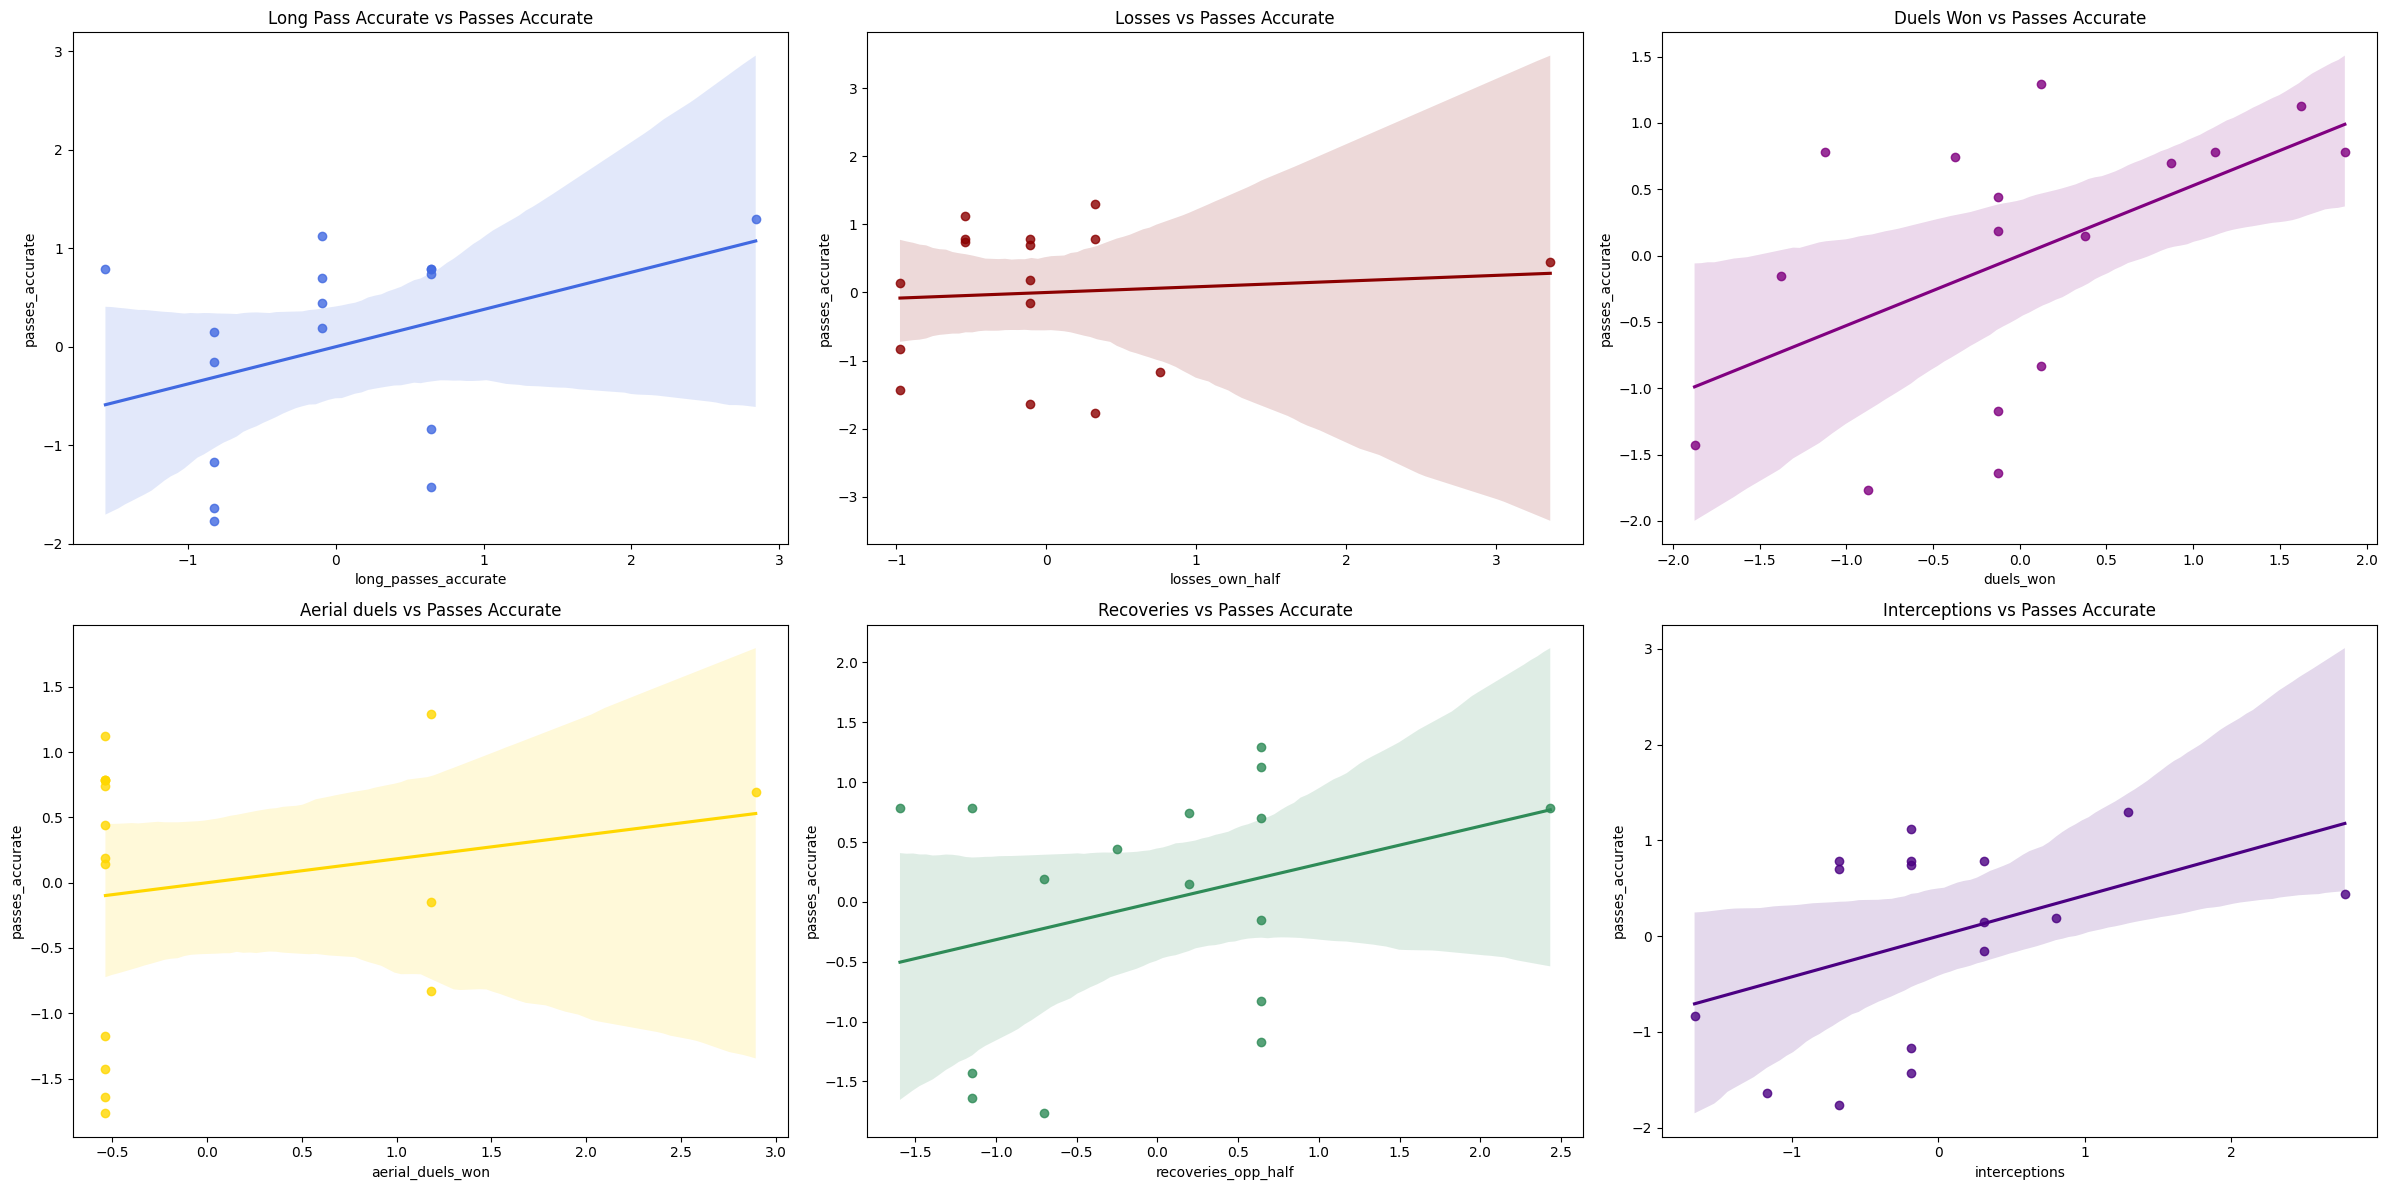

In [ ]:
import statsmodels.api as sm

# Defining the independent variables
X = normalized_df[['long_passes_accurate', 'losses_own_half', 
                   'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]

# Adding a constant to the independent variables
X = sm.add_constant(X)

# Defining the dependent variable
Y = normalized_df['passes_accurate']

# Performing the linear regression
model = sm.OLS(Y, X)
results = model.fit()

# Print the results
print(results.summary())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(2, 3, figsize=(24, 12))

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, ax=axs[0, 0], color='royalblue')
axs[0, 0].set_title('Long Pass Accurate vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, ax=axs[0, 1], color='darkred')
axs[0, 1].set_title('Losses vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, ax=axs[0, 2], color='purple')
axs[0, 2].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='aerial_duels_won', y='passes_accurate', data=normalized_df, ax=axs[1, 0], color='gold')
axs[1, 0].set_title('Aerial duels vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, ax=axs[1, 1], color='seagreen')
axs[1, 1].set_title('Recoveries vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, ax=axs[1, 2], color='indigo')
axs[1, 2].set_title('Interceptions vs Passes Accurate')

plt.tight_layout()
plt.show()

## Sci-kit Learn Linear Regression

### The linear regression model is represented as:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n + \epsilon $$


### Based on Total Actions

Mean r^2 over all K-Fold folds: 0.845833490654487
Coefficients:
passes_accurate: 0.9198082513370631
long_passes_accurate: 0.023927995099049693
losses_own_half: 0.14524733200405904
duels_won: 0.010317709348334553
Mean squared error: 0.01
Coefficient of determination: 0.99


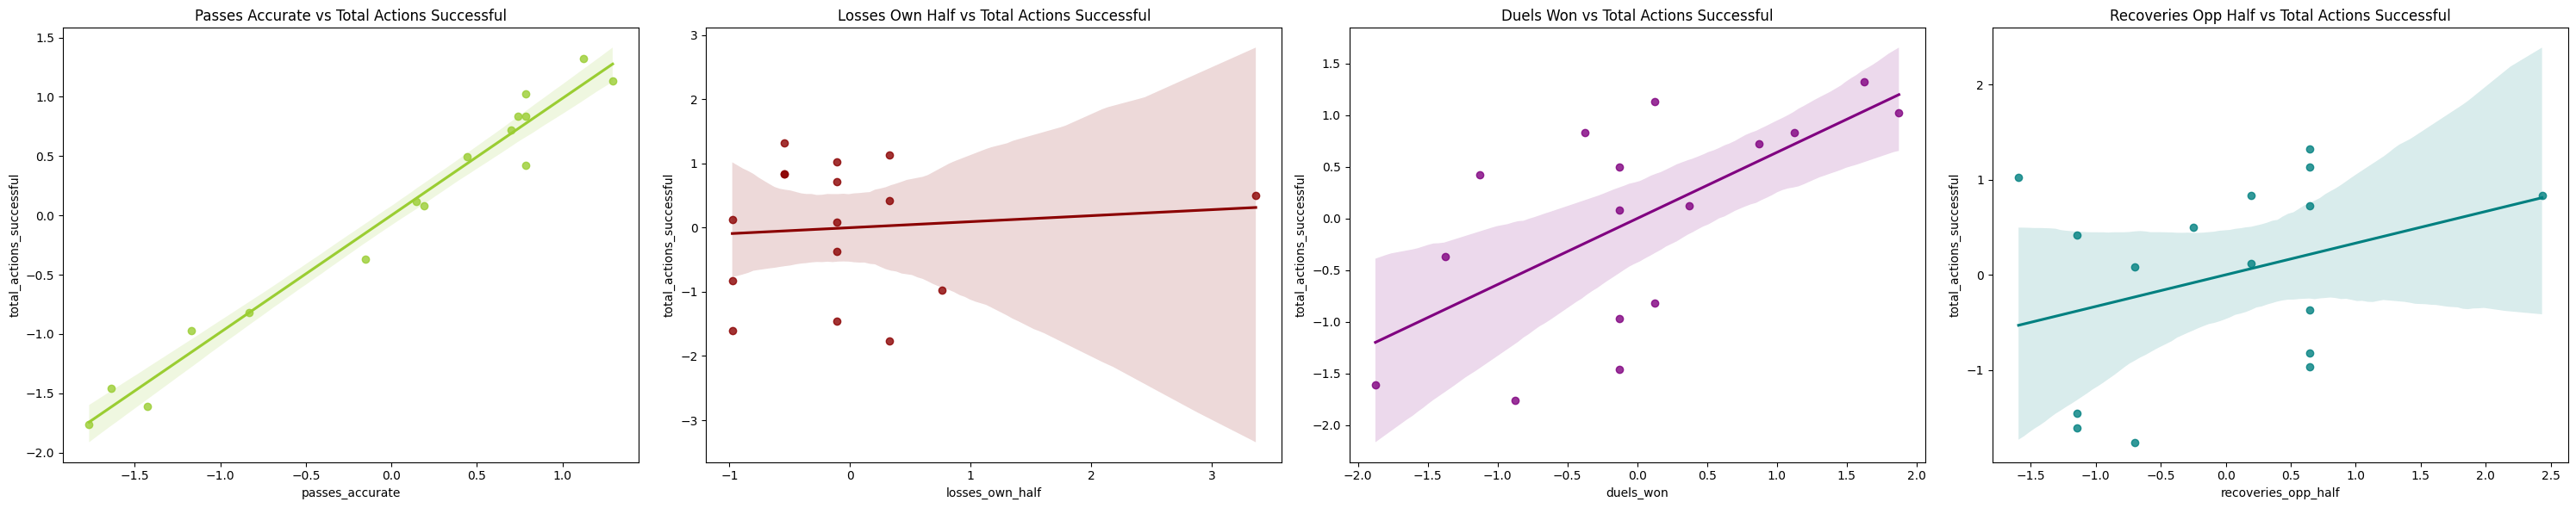

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Prepare the data
X = normalized_df[['passes_accurate', 'losses_own_half', 'duels_won', 'recoveries_opp_half']]
y = normalized_df['total_actions_successful']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, figsize=(30, 6))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[1])
axs[1].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='teal', ax=axs[3])
axs[3].set_title('Recoveries Opp Half vs Total Actions Successful')


plt.tight_layout()
plt.show()

Passes Accurate (0.91): accurate passes have a pronounced positive correlation with Verratti's total successful actions. On football optics, this illustrates that Verratti's core strength lies in his pinpoint passing ability, consistently distributing the ball and setting the rhythm of the game.

Long Passes Accurate (0.02): have a minor positive relationship with Verratti's total successful actions. On football optics, while Verratti isn't typically known for his long-range distribution, when he chooses to unleash them, they generally contribute to his overall effectiveness on the pitch.

Losses in Own Half (0.14): present a positive association with his total successful actions. On football optics, this might appear counterintuitive, but it can indicate that during games where he's more involved (and therefore more successful actions), there's also a higher likelihood of him making errors due to increased involvement.

Duels Won (0.01): Statistically, duels won have a negligible positive impact on his total successful actions. On football optics, while Verratti might engage in and win duels, it's his intricate passing and ball control that more dominantly defines his overall contribution to the game.

Overall, the mean r^2 value of 0.84 signifies that the model explains about 84.6% of the variance in Verratti's total actions, denoting that these features are substantial indicators of his overall activity in a game. The coefficient of determination, standing at an impressive 0.99, underscores the reliability of this model in depicting Verratti's influence on the pitch. Essentially, the midfield dynamo's effectiveness stems from his masterful passing and game control, but it's also essential to recognize that in more intense matches, higher involvement might lead to occasional errors – a testament to the demanding nature of elite football.

### Based on Pass Accuracy

Mean r^2 over all K-Fold folds: 0.2081898235716028
Coefficients:
total_actions_successful: 1.0662604270527611
long_passes_accurate: -0.012400106254263604
losses_own_half: -0.046163734861569015
duels_won: -0.156273643078153
aerial_duels_won: 0.042793393988623155
recoveries_opp_half: -0.02107869078437599
interceptions: 0.035617681074694575
Mean squared error: 0.01
Coefficient of determination: 0.99


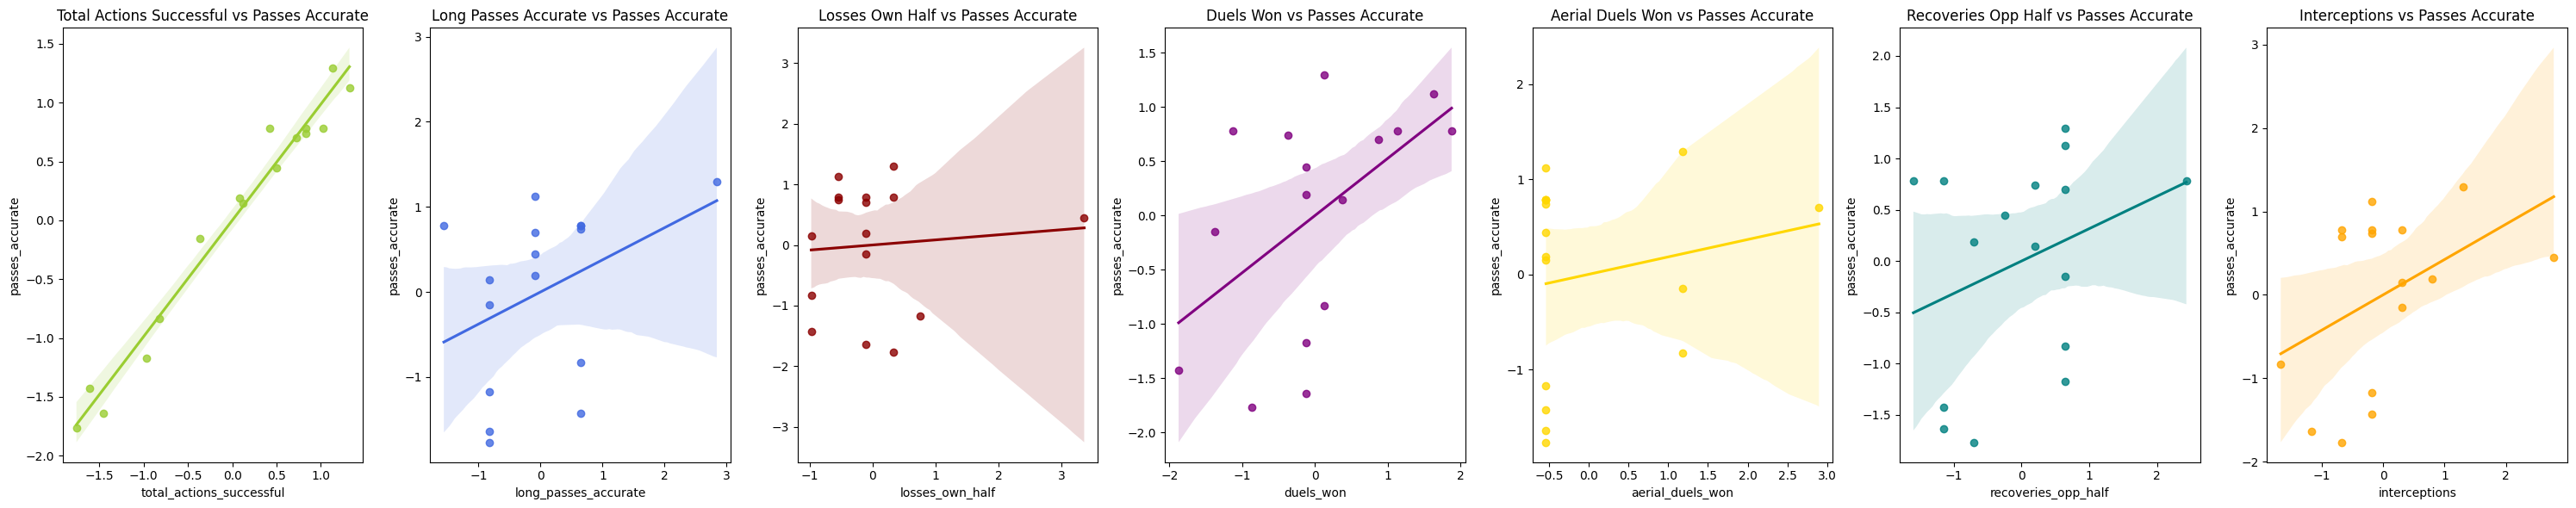

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]
y = normalized_df['passes_accurate']

# Create linear regression object
model = LinearRegression()

# Apply K-Fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)
r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')

# Print the mean R^2 score
print('Mean r^2 over all K-Fold folds:', r2_scores.mean())

# Split the data into training and test sets for additional evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Print the coefficients
feature_names = ['total_actions_successful', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']
print('Coefficients:')
for coef, feature in zip(model.coef_, feature_names):
    print(f'{feature}: {coef}')

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 7, figsize=(30, 6))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='losses_own_half', y='passes_accurate', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Losses Own Half vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='aerial_duels_won', y='passes_accurate', data=normalized_df, color='gold', ax=axs[4])
axs[4].set_title('Aerial Duels Won vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='teal', ax=axs[5])
axs[5].set_title('Recoveries Opp Half vs Passes Accurate')

sns.regplot(x='interceptions', y='passes_accurate', data=normalized_df, color='orange', ax=axs[6])
axs[6].set_title('Interceptions vs Passes Accurate')

plt.tight_layout()
plt.show()

Total Actions Successful (1.06): successful total actions have a substantial positive correlation with Verratti's pass accuracy. On football optics, this highlights Verratti's renowned consistency and precision in his actions, including his passing choices and execution.

Long Passes Accurate (-0.012400106254263604): Analytically, there's a slight negative relationship between his long pass accuracy and overall pass accuracy. On football optics, this might suggest that while Verratti is skilled in many aspects, his long-range passes might occasionally miss their mark, or they represent riskier options.

Losses in Own Half (-0.04): there's a negative association between losses in his own half and his passing accuracy. On football optics, this emphasizes the importance of not losing possession, especially for a central midfielder like Verratti, where turnovers can lead to counter-attacks.

Duels Won (-0.15): Statistically, a negative correlation exists between duels won and his pass accuracy. On football optics, this could imply that in scenarios where Verratti engages more in duels, it might disrupt his passing rhythm or force him into situations where his passing choices are more limited.

Aerial Duels Won (0.04): Analytically, winning aerial duels has a slight positive impact on his passing accuracy. On football optics, this suggests that on the occasions Verratti wins headers, he might be effectively setting up play or retaining possession.

Recoveries in Opponent's Half (-0.02): recoveries in the opponent's half show a small negative influence on his pass accuracy. On football optics, while Verratti's recoveries are crucial, they might occasionally lead to quicker, riskier passes in advanced positions.

Interceptions (0.03): Statistically, interceptions have a modest positive relationship with Verratti's pass accuracy. On football optics, when Verratti intercepts the ball, he's likely reading the game well and is in a position to distribute it effectively.

Overall, with a mean r^2 value of 0.20, this model explains about 21% of the variance in Verratti's pass accuracy, indicating that while the features listed play a role, other factors also significantly influence his passing proficiency. The high coefficient of determination at 0.99 suggests a nearly perfect model fit, reinforcing Verratti's reputation as a midfield maestro. His pass accuracy stems from an intricate blend of technical skill, game intelligence, and decision-making, which isn't entirely encapsulated solely by the metrics given but is certainly reflected in his impressive on-pitch displays.

## XGBoost

### The prediction for XGBoost is given by:

$$ \hat{y} = \sum_{k=1}^{K} f_k(x) $$

where $$ f_k(x) $$ is the prediction of the $$ k $$-th weak learner.


### Based on Total Actions

Mean squared error: 0.19
Coefficient of determination: 0.81
Cross-Validation Mean Score: 0.58


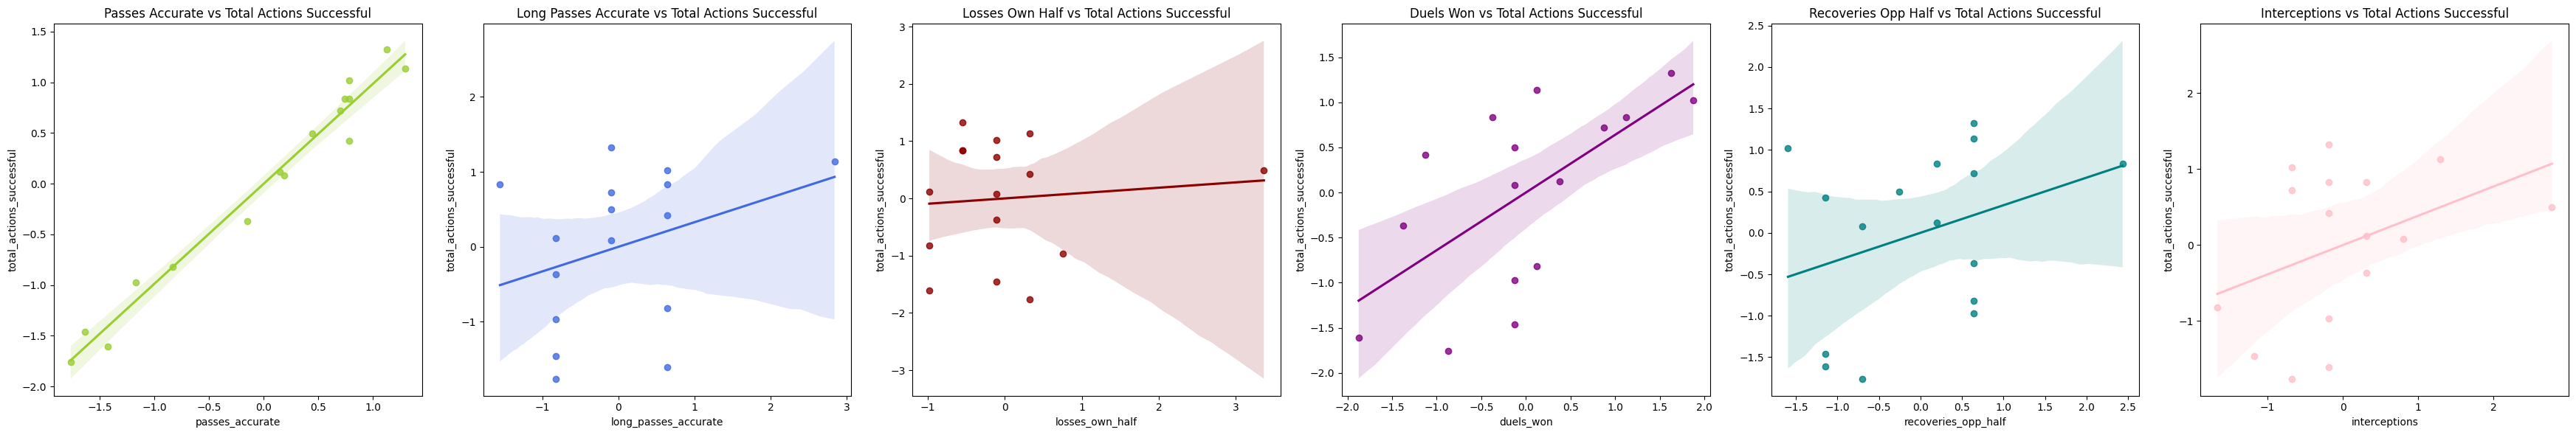

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'losses_own_half', 'duels_won','recoveries_opp_half', 'interceptions']]
y = normalized_df['total_actions_successful']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 6, figsize=(35, 6))

sns.regplot(x='passes_accurate', y='total_actions_successful', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Passes Accurate vs Total Actions Successful')

sns.regplot(x='long_passes_accurate', y='total_actions_successful', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Total Actions Successful')

sns.regplot(x='losses_own_half', y='total_actions_successful', data=normalized_df, color='darkred', ax=axs[2])
axs[2].set_title('Losses Own Half vs Total Actions Successful')

sns.regplot(x='duels_won', y='total_actions_successful', data=normalized_df, color='purple', ax=axs[3])
axs[3].set_title('Duels Won vs Total Actions Successful')

sns.regplot(x='recoveries_opp_half', y='total_actions_successful', data=normalized_df, color='teal', ax=axs[4])
axs[4].set_title('Recoveries Opp Half vs Total Actions Successful')

sns.regplot(x='interceptions', y='total_actions_successful', data=normalized_df, color='pink', ax=axs[5])
axs[5].set_title('Interceptions vs Total Actions Successful')

plt.tight_layout()
plt.show()

The XGBoost output and the cross-validation result provide us with insight into the model's performance and its robustness when exposed to unseen data.

The mean squared error (MSE) of the model is 0.19. MSE measures the average squared difference between the actual and predicted values, with lower values indicating a better fit to the data. A value of 0.19 suggests the model has decent accuracy but is not as perfect as the previous models.

The coefficient of determination, or R-squared, is 0.81. This means that approximately 81% of the variation in total successful actions can be explained by the input features in the model. While this is lower than the R-squared values in the previous models, an R-squared of 0.81 is still quite high and indicates a strong predictive model. On football optics, it shows that our selected features capture a large proportion, but not all, of the factors contributing to Verratti's total successful actions.

The Cross-Validation Mean Score of 0.58 provides a more robust assessment of the model's performance. Cross-validation involves partitioning the original sample into a training set to train the model, and a test set to evaluate it. In k-fold cross-validation, the original sample is randomly partitioned into k equal-sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged (or otherwise combined) to produce a single estimation.

The advantage of this method over repeated random sub-sampling is that all observations are used for both training and validation, and each observation is used for validation exactly once. A score of 0.58 indicates that the model's performance decreases when applied to new, unseen data, but still retains over half of its explanatory power. This is a crucial indication of the model's ability to generalize to new data, which is essential in practice. On football optics, while the model captures significant aspects of Verratti's game contributing to his total successful actions, the cross-validation score indicates that there might be other factors not captured by the model that influence Verratti's performance. 

### Based on Pass Accuracy

Mean squared error: 0.12
Coefficient of determination: 0.87
Cross-Validation Mean Score: 0.74


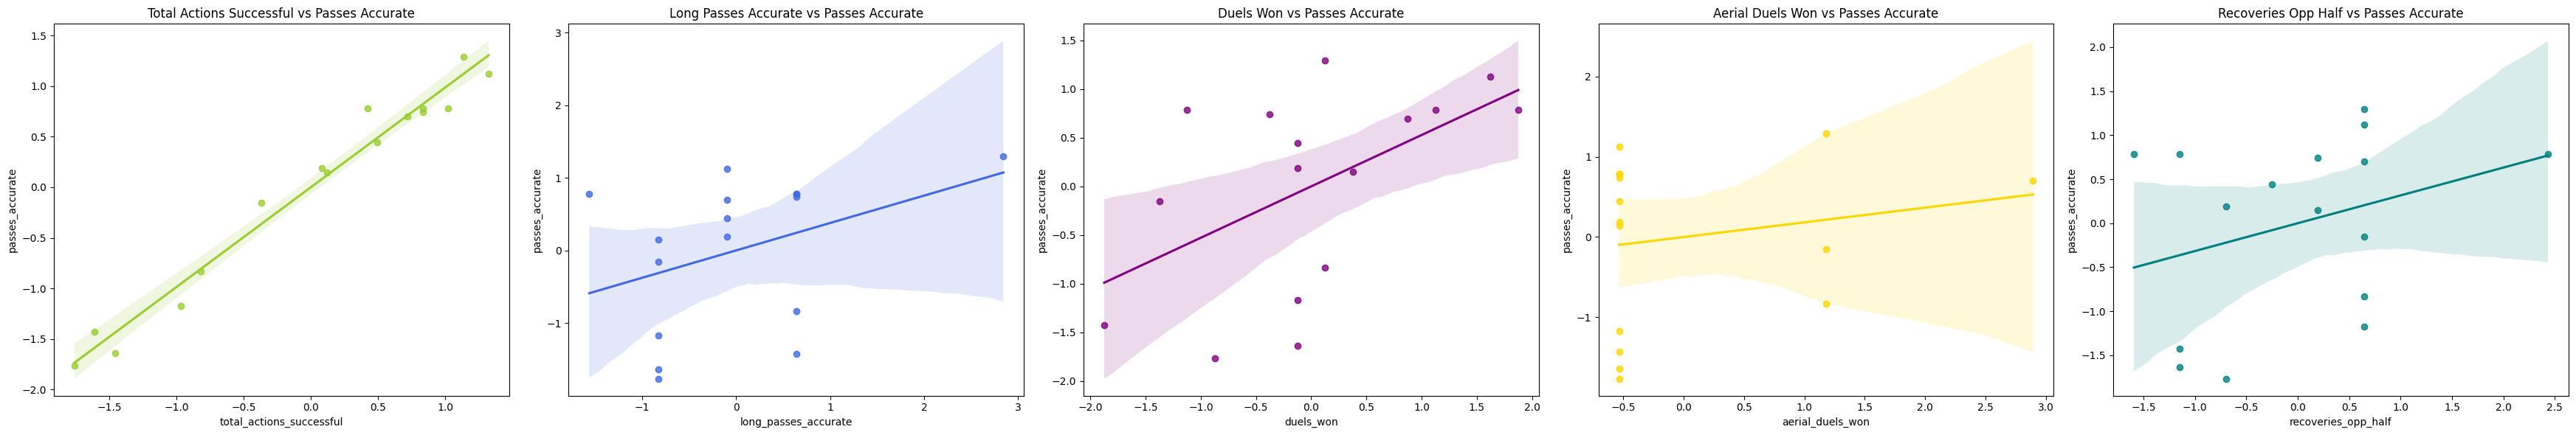

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half']]
y = normalized_df['passes_accurate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create XGBoost regression object
model = XGBRegressor()

# Train the model using the training sets
model.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = model.predict(X_test)

# Calculate and display the mean squared error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: %.2f' % mse)

# Calculate and display the coefficient of determination
r2 = r2_score(y_test, y_pred)
print('Coefficient of determination: %.2f' % r2)

# Perform 5-fold cross validation and display mean score
scores = cross_val_score(model, X, y, cv=5)
print('Cross-Validation Mean Score: %.2f' % scores.mean())

# Visualizing the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 5, figsize=(35, 6))

sns.regplot(x='total_actions_successful', y='passes_accurate', data=normalized_df, color='yellowgreen', ax=axs[0])
axs[0].set_title('Total Actions Successful vs Passes Accurate')

sns.regplot(x='long_passes_accurate', y='passes_accurate', data=normalized_df, color='royalblue', ax=axs[1])
axs[1].set_title('Long Passes Accurate vs Passes Accurate')

sns.regplot(x='duels_won', y='passes_accurate', data=normalized_df, color='purple', ax=axs[2])
axs[2].set_title('Duels Won vs Passes Accurate')

sns.regplot(x='aerial_duels_won', y='passes_accurate', data=normalized_df, color='gold', ax=axs[3])
axs[3].set_title('Aerial Duels Won vs Passes Accurate')

sns.regplot(x='recoveries_opp_half', y='passes_accurate', data=normalized_df, color='teal', ax=axs[4])
axs[4].set_title('Recoveries Opp Half vs Passes Accurate')

plt.tight_layout()
plt.show()

Mean Squared Error (MSE) (0.12): meaning even a few larger discrepancies can significantly increase this value. An MSE of 0.12, in the context of pass accuracy, suggests that the model's predictions might have occasional significant deviations from the actual outcomes, though the overall prediction could be relatively close. On football optics, For a midfielder like Marco Verratti, who's known for his exquisite passing, even minor deviations in predictions can have match-defining consequences. This number implies that, in some games, Verratti's pass accuracy might vary more than expected based on the model's predictions.

Coefficient of Determination (R^2) (0.87): is a good indicator of how well the independent variables in the model explain the variation in the dependent variable. An R^2 of 0.87 indicates a strong fit, suggesting that about 87% of the variance in Verratti's pass accuracy can be explained by the model. This is a commendable score for a regression model. On football optics, This suggests that the model can, to a significant extent, predict Verratti's pass accuracy in games. Given his central role in dictating play, understanding and anticipating his passing proficiency can be crucial for both his team and opponents.

Cross-Validation Mean Score (0.74): provides a robust understanding of how the model performs on unseen data by splitting the dataset into various segments. A score of 0.74 is positive, indicating that the model generalizes well across different subsets of the data, reinforcing its predictive capability. On football optics, Given the diverse scenarios in football, a model that generalizes well across different situations reinforces the idea that Verratti's passing ability remains consistent and can be expected to follow certain patterns across various matches.

In summary, the XGBoost Regressor Model for Marco Verratti based on "Pass Accuracy" seems to have a good grasp of his passing proficiency. While the model captures a majority of the patterns, some refinement or incorporation of additional features might further improve its accuracy, capturing the nuanced aspects of Verratti's game.

## Conformal Predictions

### Conformal Prediction provides a prediction interval such that:

$$ P(y \in [L(x), U(x)]) = 1 - \alpha $$

where $$ L(x) $$ and $$ U(x) $$ are the lower and upper bounds of the prediction interval, and $$ \alpha $$ is the significance level.


### Based on Total Actions

Prediction interval coverage: 75.76%
Average prediction interval width: 5.03


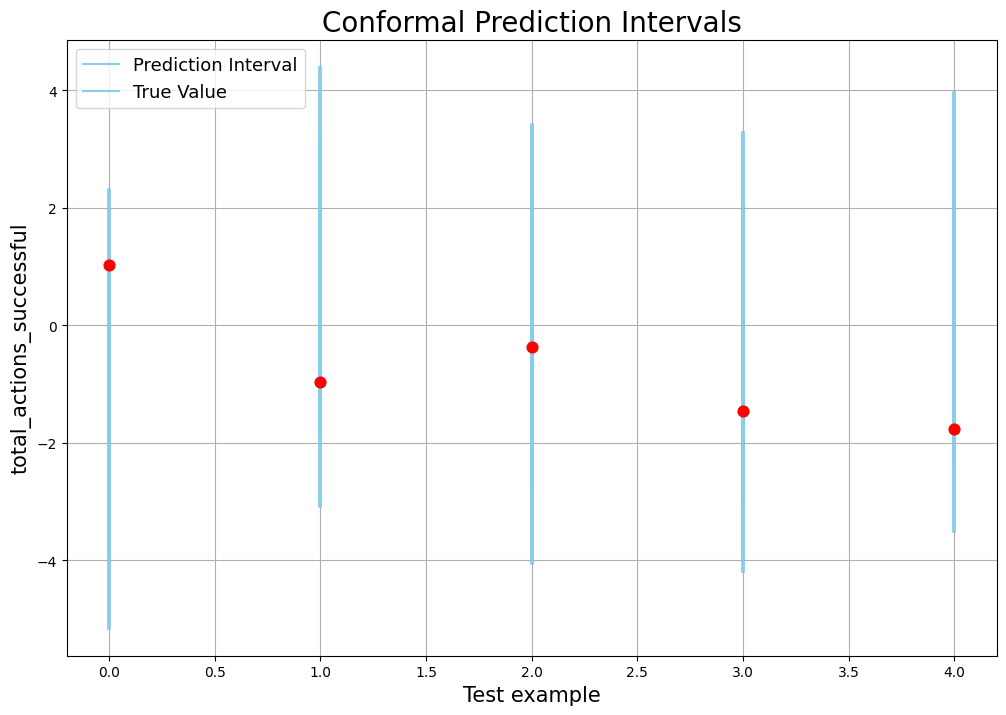

In [ ]:
# Prepare the data
X = normalized_df[['passes_accurate', 'long_passes_accurate', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half', 'interceptions']]
y = normalized_df['total_actions_successful']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('total_actions_successful', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.grid(True)
plt.show()

Prediction interval coverage (75.76%): implies a relatively high confidence in the model's predictions regarding Verratti's involvement in a game. This suggests that in about 3 out of 4 matches, the model can accurately predict the range of total actions Verratti will take part in. Considering Verratti's role as a central midfielder and his penchant for being heavily involved, this level of prediction accuracy underscores the consistency in his performances. From a football viewpoint, reinforces the notion of Marco Verratti as an instrumental figure in the heart of the midfield. His consistent involvement in build-up play, distribution, and defensive duties makes him a linchpin for his team. This percentage underscores that Verratti is not just active but predictably active, showcasing his importance in controlling the tempo and rhythm of the match.

Average prediction interval width (5.03): signifies the expected range of actions he's involved in during a match. Given this interval isn't too broad, it implies a certain consistency in his involvement. While some matches might see higher intensity and require more from Verratti, others might be more controlled, yet the prediction range remains reasonably tight. On football optics, highlights that Verratti's involvement in a match is consistent, yet adaptive. Whether it's through circulating possession, breaking up opposition play, or linking defense with attack, Verratti's role demands him to be present in many phases of the game. This interval showcases that, depending on the match scenario, he can adapt his involvement without deviating too far from his usual influence.

In summary, the conformal prediction results for Marco Verratti's "Total Actions" emphasize his role as a midfield metronome, consistently influencing games with his varied contributions. 

### Based on Pass Accuracy

Prediction interval coverage: 75.76%
Average prediction interval width: 118.96


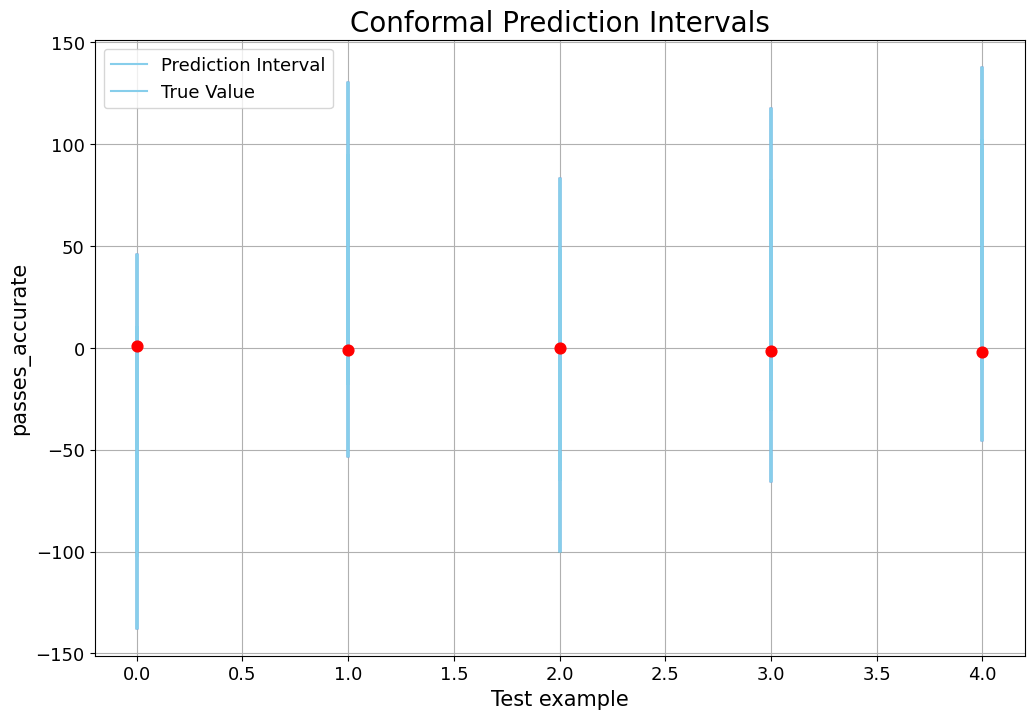

In [ ]:
# Prepare the data
X = normalized_df[['total_actions_successful', 'long_passes_accurate', 'losses_own_half', 'duels_won', 'aerial_duels_won', 'recoveries_opp_half']]
y = normalized_df['passes_accurate']

# Split the data into training and calibration datasets
X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.3, random_state=42)

# Fit the underlying model
underlying_model = LinearRegression()
underlying_model.fit(X_train, y_train)

# Create a nonconformity function and Inductive Conformal Predictor
nc = RegressorNc(underlying_model)
icp = IcpRegressor(nc)

# Fit the ICP using the proper training set
icp.fit(X_train.values, y_train.values)

# Calibrate the ICP using the calibration set
icp.calibrate(X_calib.values, y_calib.values)

# Produce predictions (which are prediction intervals) for the test set
predictions = icp.predict(X_test.values)

# Evaluation
coverage = np.mean([(lower <= y) & (y <= upper) for (lower, upper), y in zip(predictions, y_test.values)])
avg_width = np.mean([upper - lower for lower, upper in predictions])

print(f"Prediction interval coverage: {coverage*100:.2f}%")
print(f"Average prediction interval width: {avg_width:.2f}")

# Flatten y_test values for visualization
y_test_flat = y_test.values.flatten()

# Visualization
plt.figure(figsize=(12, 8))

# Draw the interval lines
for i, (lower, upper) in enumerate(predictions):
    plt.plot([i, i], [lower, upper], color='skyblue', linewidth=1.5)

# Add scatter plot for true values
plt.scatter(range(len(y_test_flat)), y_test_flat, color='red', s=60, zorder=5)

# Enhance the plot
plt.title('Conformal Prediction Intervals', fontsize=20)
plt.xlabel('Test example', fontsize=15)
plt.ylabel('passes_accurate', fontsize=15)
plt.legend(['Prediction Interval', 'True Value'], fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Display the grid
plt.grid(True)
plt.show()

Prediction interval coverage (75.76%): indicates a commendable model performance. In roughly three out of four matches, the model accurately anticipates the range for Verratti's passing accuracy percentage. Given that passing is a pivotal part of Verratti's game and the fact that he operates in midfield where numerous factors influence passing outcomes, this accuracy rate speaks volumes about the consistency of his passing. On football optics, underscores Verratti's role as a precision playmaker. He's not just a midfielder who maintains possession; he does so with notable accuracy. It's evident that Verratti's skill and decision-making play a significant part in ensuring that his passes reach their intended targets, even under pressure.

Average prediction interval width (118.96): might initially appear high. However, remember that this is a percentage-based metric, so it seems that there's a broad predicted range for Verratti's pass accuracy in any given match. This could reflect a variety of factors – from the nature of the opposition, the game's context, or even differing tactical approaches. It's somewhat unexpected for such a wide interval for a metric often ranging between 0-100%, and it might be worth investigating the model further or reassessing data inputs. On football optics, suggests that while Verratti consistently maintains a high passing accuracy, the variance between his best and most challenging games is considerable. It could imply that against high pressing teams or in games where tactical complexities are involved, his accuracy may see more significant fluctuations.

In a nutshell, while the prediction coverage emphasizes Verratti's consistent passing accuracy, the wide prediction interval width hints at significant game-to-game variations. This duality emphasizes the dynamic challenges faced by a midfielder in the ever-evolving landscape of football. 

## Radar Map

### M. Verrari Performance PSG 1st Leg

- Duels Won(DW): 56%

- Total Actions Success: 78%

- Passes Accurate: 95% 

- Long Pass Accuracy (LPA): 0%

- Cross Accuracy(Cr.A): 0%

- Losses own Half (LOH): 33%

- Recoveries(ROPH): 82%

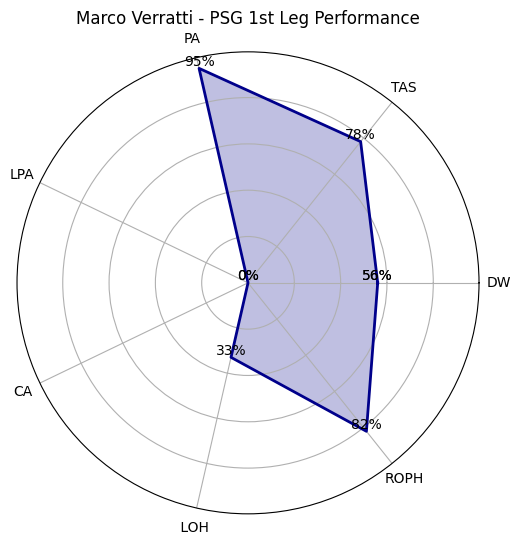

In [ ]:
# Define the data for the radar chart
labels = np.array(['DW', 'TAS', 'PA', 'LPA', 'CA',' LOH', 'ROPH'])
stats = np.array([56, 78, 95, 0, 0, 33, 82])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title('Marco Verratti - PSG 1st Leg Performance')

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='darkblue', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='darkblue', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

### M. Verrari Performance PSG 2nd Leg

- Duels Won(DW): 45%

- Total Actions Success: 83%

- Passes Accurate: 94% 

- Long Pass Accuracy (LPA): 75%

- Cross Accuracy(Cr.A): 100%

- Losses own Half (LOH): 50%

- Recoveries(ROPH): 17%

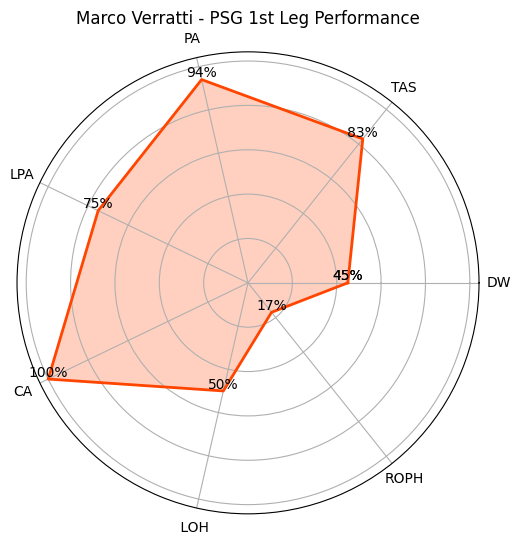

In [ ]:
# Define the data for the radar chart
labels = np.array(['DW', 'TAS', 'PA', 'LPA', 'CA',' LOH', 'ROPH'])
stats = np.array([45, 83, 94, 75, 100, 50, 17])

# Number of variables
num_vars = len(labels)

# Calculate angle of each axis in the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Make the radar chart circular
stats = np.concatenate((stats,[stats[0]]))
angles += angles[:1]

# Set up the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
plt.title('Marco Verratti - PSG 1st Leg Performance')

# Draw the perimeter of the radar chart
ax.fill(angles, stats, color='orangered', alpha=0.25)

# Draw the lines of the spider web
ax.plot(angles, stats, color='orangered', linewidth=2)

# Draw the axes of the spider web
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])  # Here, the last tick has been removed
ax.set_xticklabels(labels)

# Display stat values as percentages
for i, (angle, stat) in enumerate(zip(angles, stats)):
    ax.text(angle, stat, f'{stat}%', ha='center', va='bottom')

# Draw the chart
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f30fe24d-62de-4dda-9529-c24022edf5aa' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>